<a href="https://colab.research.google.com/github/deniseiras/Artificial-Intelligence/blob/main/CAP_421_Atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Esse Notebook pode ser acessado por: https://colab.research.google.com/drive/1-FSQiLzD9GuQhW7m1fLNRZ9IAIK4gbAC?usp=sharing

---

# CAP 421 - Aprendizado Profundo - Turma 1 - 2021
### Prof. Elcio Hideiti Shiguemori

### **Atividade 5 - Exemplo aplicação em Python ou C/C++ - MLP Profunda**


## Considerações sobre a atividade

- Apresentar a execução de um exemplo do uso de redes neurais de múltiplas camadas profundas, sem o uso de redes convolucinais.
- Entregar um relatório contendo o resumo da aplicação, evidenciando os tópicos abordados em aula.
- Disponibilizar o link da aplicação no Google Colab ou Github.
- Pontos bônus: usar os seus próprios dados.

## Grupo

*   Daniel Merli Lamosa
*   Denis Magalhaes De Almeida Eiras
*   Luiz Gustavo Miranda Pinto

# Introdução
O experimento com MLPs foi baseado em dados extraídos de entrada e saída da
Microfísica Morrisson-Thompson-Tatarskii Two-Moment Microphysics do Modelo de uma coluna BAM1D (dataset próprio). A partir da execução do BAM-1D, os dados do nível da altura da atmosfera (k), razão de mistura de vapor d'água, água de nuvem, água de chuva, gelo de nuvem e graupel, além de concentração de gelo de nuvem, neve, chuva, graupel e gota de nuvem e o nível sigma da camada da interface e do ponto médio, turbulência e coeficiente de difusão de turbilhões de calor YSU, raio efetivo de água e de gelo de nuvem, e chuva e neve de larga escala foram computados.

Os dados de entrada da microfísica entram na camada de entrada da MLP, e os de
saída, na camada de saída, simulando assim a rotina de microfísica.

# Objetivo

Encontrar a melhor arquitetura, momentum e normalizações L1 e L2 para uma MLP,
e avaliar o impacto da utilização das variações desses parâmetros.

# Metodologia
A base de testes foi dividida em 80% para treinamento e 20% para testes. 20% da
base de treinamento foi utilizada para validação interna da rede.
Foram selecionadas 16 variáveis de entrada e 16 variáveis de saída, as quais
descartou-se níveis que não possuíam variação de valores.
Foram avaliadas topologias MLP com 2 a 32 camadas, de 2 a 256 neurônios, com
saída linear e com o algoritmo Stochastic Gradient Descendent. Foram fixados: 
- Número de épocas = 100
- Batch size = 64
- Taxa de aprendizado em 0.01
- Função de ativação sigmóide
- Inicialização de pesos “Xavier”
- Tipo de perda "mean squared error"
- Métricas de avaliação "Root Mean Squared Error" (RMSE) e "Mean Aritmetich Error" (MAE).

Os testes das MLPs foram exibidos em gráficos de barras, apresentando RMSEs e
MAEs da base de testes, para escolha da melhor MLP com base nestas métricas.
A partir da melhor MLP, foram variadas as taxas de momento entre 0.99999 e 0.9 e
a normalização L1 e L2 entre 0.00001 e 0.1, aplicadas ao Kernel e BIAS. Todos os testes foram executados com somente uma variação por vez.


## Parâmetros da rotina

SUBROUTINE RunMicro_HugMorr(

ncols - numero de colunas - fixo = 1
nCols , &!INTEGER , INTENT(IN ) :: nCols

kmax - número de níveis = k_max
kMax , &!INTEGER , INTENT(IN ) :: kMax

si - kmax+1 removido, sem valores/usado si , &!REAL(KIND=r8), INTENT(IN ) :: si(kMax+1)

sl
sl , &!REAL(KIND=r8), INTENT(IN ) :: sl(kMax)

tc - Temperature(K)
tc , &!REAL(KIND=r8), INTENT(INOUT) :: Tc (1:nCols, 1:kMax)

Q's - Mixing ratio

QV - water vapor
QV , &!REAL(KIND=r8), INTENT(INOUT) :: qv (1:nCols, 1:kMax)

QC - cloud water
QC , &!REAL(KIND=r8), INTENT(INOUT) :: qc (1:nCols, 1:kMax)

QR - rain water
QR , &!REAL(KIND=r8), INTENT(INOUT) :: qr (1:nCols, 1:kMax)

QI - cloud ice
QI , &!REAL(KIND=r8), INTENT(INOUT) :: qi (1:nCols, 1:kMax)

QS - Snow
QS , &!REAL(KIND=r8), INTENT(INOUT) :: qs (1:nCols, 1:kMax)

QG - Graupel
QG , &!REAL(KIND=r8), INTENT(INOUT) :: qg (1:nCols, 1:kMax)

N's - number concentration

NI - cloud ice
NI , &!REAL(KIND=r8), INTENT(INOUT) :: ni (1:nCols, 1:kMax)

NS - Snow
NS , &!REAL(KIND=r8), INTENT(INOUT) :: ns (1:nCols, 1:kMax)

NR - Rain
NR , &!REAL(KIND=r8), INTENT(INOUT) :: nr (1:nCols, 1:kMax)

NG - Graupel
NG , &!REAL(KIND=r8), INTENT(INOUT) :: NG (1:nCols, 1:kMax)

NC - Cloud droplet
NC , &!REAL(KIND=r8), INTENT(INOUT) :: NC (1:nCols, 1:kMax)

TKE - turbulence kinetic energy (m^2 s-2), NEEDED FOR DROPLET ACTIVATION
TKE , &!REAL(KIND=r8), INTENT(IN ) :: TKE (1:nCols, 1:kMax)

KZH - heat eddy diffusion coefficient from YSU scheme (M^2 S-1), NEEDED FOR DROPLET ACTIVATION
KZH , &!REAL(KIND=r8), INTENT(IN ) :: KZH (1:nCols, 1:kMax)

gps - Pressão - removida da entrada da RNA - valor fixo
gps , &!gps- AIR PRESSURE (PA)

DT_IN - model time step (sec) - Removido da entrada da RNA DT_IN , &!REAL(KIND=r8), INTENT(IN ) :: dt_in

omega
omega , &!REAL(KIND=r8), INTENT(IN ) :: omega ! omega (Pa/s)

EFFCS - CLOUD DROPLET EFFECTIVE RADIUS OUTPUT TO RADIATION CODE (micron)
EFFCS , &!REAL(KIND=r8), INTENT(OUT ) :: EFFCS (1:nCols, 1:kMax)

EFFIS - ICE DROPLET EFFECTIVE RADIUS OUTPUT TO RADIATION CODE (micron)
EFFIS , &!REAL(KIND=r8), INTENT(OUT ) :: EFFIS (1:nCols, 1:kMax)

LSRAIN - Large scale Rain
LSRAIN , &!REAL(KIND=r8), INTENT(OUT) :: LSRAIN(1:nCols)

LSSNOW - Large scale Snow
LSSNOW )!REAL(KIND=r8), INTENT(OUT) :: LSSNOW(1:nCols)

# Inicialização das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
import sklearn 
import scipy

from google.colab import drive
import pandas as pd
from IPython import display

print(tf.__version__)

2.6.0


# Carregamento do Dataset

In [ ]:

original_input_df = pd.read_csv("https://www.dropbox.com/s/m98930ij3ekjzv6/hug_morr_inputs_CRD_RRTMG.csv?dl=1", sep=",")
original_output_df = pd.read_csv("https://www.dropbox.com/s/rxvaxv09fxsmbta/hug_morr_outputs_CRD_RRTMG.csv?dl=1", sep=",")

print("\nAll input summary:")
display.display(original_input_df.describe())
print("\nAll output summary:")
display.display(original_output_df.describe())



All input summary:


k             si  ...       gps          omega
count  265468.000000  265468.000000  ...  265468.0  265468.000000
mean       14.500000       0.468551  ...   99000.0      -0.031886
std         8.077762       0.363561  ...       0.0       0.124607
min         1.000000       0.003669  ...   99000.0      -1.040423
25%         7.750000       0.103880  ...   99000.0      -0.032514
50%        14.500000       0.432240  ...   99000.0       0.000000
75%        21.250000       0.834470  ...   99000.0       0.013516
max        28.000000       1.000000  ...   99000.0       0.240343

[8 rows x 20 columns]


All output summary:


k             Tc  ...        LSRAIN        LSSNOW
count  265468.000000  265468.000000  ...  2.654680e+05  2.654680e+05
mean       14.500000     241.338282  ...  5.634551e-07  3.335740e-15
std         8.077762      56.538138  ...  3.138632e-06  3.830762e-14
min         1.000000      78.686092  ...  1.859265e-22  0.000000e+00
25%         7.750000     200.449315  ...  4.974771e-13  1.222851e-17
50%        14.500000     259.142299  ...  1.816326e-11  2.465635e-17
75%        21.250000     289.466259  ...  2.224507e-08  1.498349e-16
max        28.000000     309.448328  ...  9.941602e-05  1.988931e-12

[8 rows x 17 columns]

# Pré-processamento dos dados



In [ ]:
def preprocess_features(input_df):
  selected_features = input_df[["k", "si", "Tc", "qv", "qc", "qr", "qi", "qs", "qg", "ni", "ns", "nr", "NG", "NC", "tke", "kzh", "omega"]]
  processed_features = selected_features.copy()
  return processed_features


def preprocess_targets(output_df):
  output_targets = output_df[["k", "Tc", "qv", "qc", "qr", "qi", "qs", "qg", "ni", "ns", "nr", "NG", "NC", "EFFCS", "EFFIS", "LSRAIN", "LSSNOW"]]
  return output_targets


def linear_scale(serie_or_np_arr, min_val, max_val):
  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
  #   X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
  # X_scaled = X_std * (max - min) + min  
  min, max = 0, 1
  y = lambda x:( ( x - min_val) / (max_val - min_val)) * (max - min) + min 
  return y(serie_or_np_arr)


def normalize_linear_scale(examples_dataframe, minmax_border_perc=0.2):
  processed_features = examples_dataframe.copy()
  for key,value in dict(examples_dataframe).items():
    if key != 'k':
        min_val = value.min() - value.min()*minmax_border_perc
        max_val = value.max() + value.max()*minmax_border_perc
        processed_features[key] = linear_scale(value, min_val, max_val)
  return processed_features


# Imprime boxplot exibindo se contém valores (True) ou não (False) em cada nível
def bloxplot_levels(df):
  for key in df.columns.tolist():
    if key == "k": continue
    bp = df.boxplot(column=key, by="k", figsize=(15, 4))
    
    x = np.arange(1,29)
    obsgroup = df[[key, 'k']].groupby(by="k")[key]
    noofobs = obsgroup.agg('sum').astype(bool)
    meanobs = obsgroup.agg('mean')

    for tick,label in zip(x,bp.get_xticklabels()):
      bp.text(x[tick-1], meanobs[tick], noofobs[tick], 
        horizontalalignment='center', color='blue' if noofobs[tick] == True else 'red' , weight='bold')
    plt.show()


# parâmetros dos dados
k_max=28
k_inicial=1
k_final=k_max

all_examples = normalize_linear_scale(preprocess_features(original_input_df))
all_targets = normalize_linear_scale(preprocess_targets(original_output_df))

print("\nAll input summary:")
display.display(all_examples.describe())
# bloxplot_levels(all_examples)


print("\nAll output summary:")
display.display(all_targets.describe())
# bloxplot_levels(all_targets)


All input summary:


k             si  ...            kzh          omega
count  265468.000000  265468.000000  ...  265468.000000  265468.000000
mean       14.500000       0.388965  ...       0.088283       0.714211
std         8.077762       0.303711  ...       0.226945       0.111182
min         1.000000       0.000613  ...       0.000017      -0.185665
25%         7.750000       0.084327  ...       0.000211       0.713651
50%        14.500000       0.358631  ...       0.000211       0.742662
75%        21.250000       0.694645  ...       0.016141       0.754722
max        28.000000       0.832925  ...       0.833322       0.957110

[8 rows x 17 columns]


All output summary:


k             Tc  ...        LSRAIN         LSSNOW
count  265468.000000  265468.000000  ...  2.654680e+05  265468.000000
mean       14.500000       0.578456  ...  4.723041e-03       0.001398
std         8.077762       0.183334  ...  2.630890e-02       0.016050
min         1.000000       0.051030  ...  3.116978e-19       0.000000
25%         7.750000       0.445867  ...  4.169994e-09       0.000005
50%        14.500000       0.636188  ...  1.522496e-07       0.000010
75%        21.250000       0.734518  ...  1.864645e-04       0.000063
max        28.000000       0.799313  ...  8.333333e-01       0.833333

[8 rows x 17 columns]

# Visualização e análise dos dados

## Histograma das Variáveis

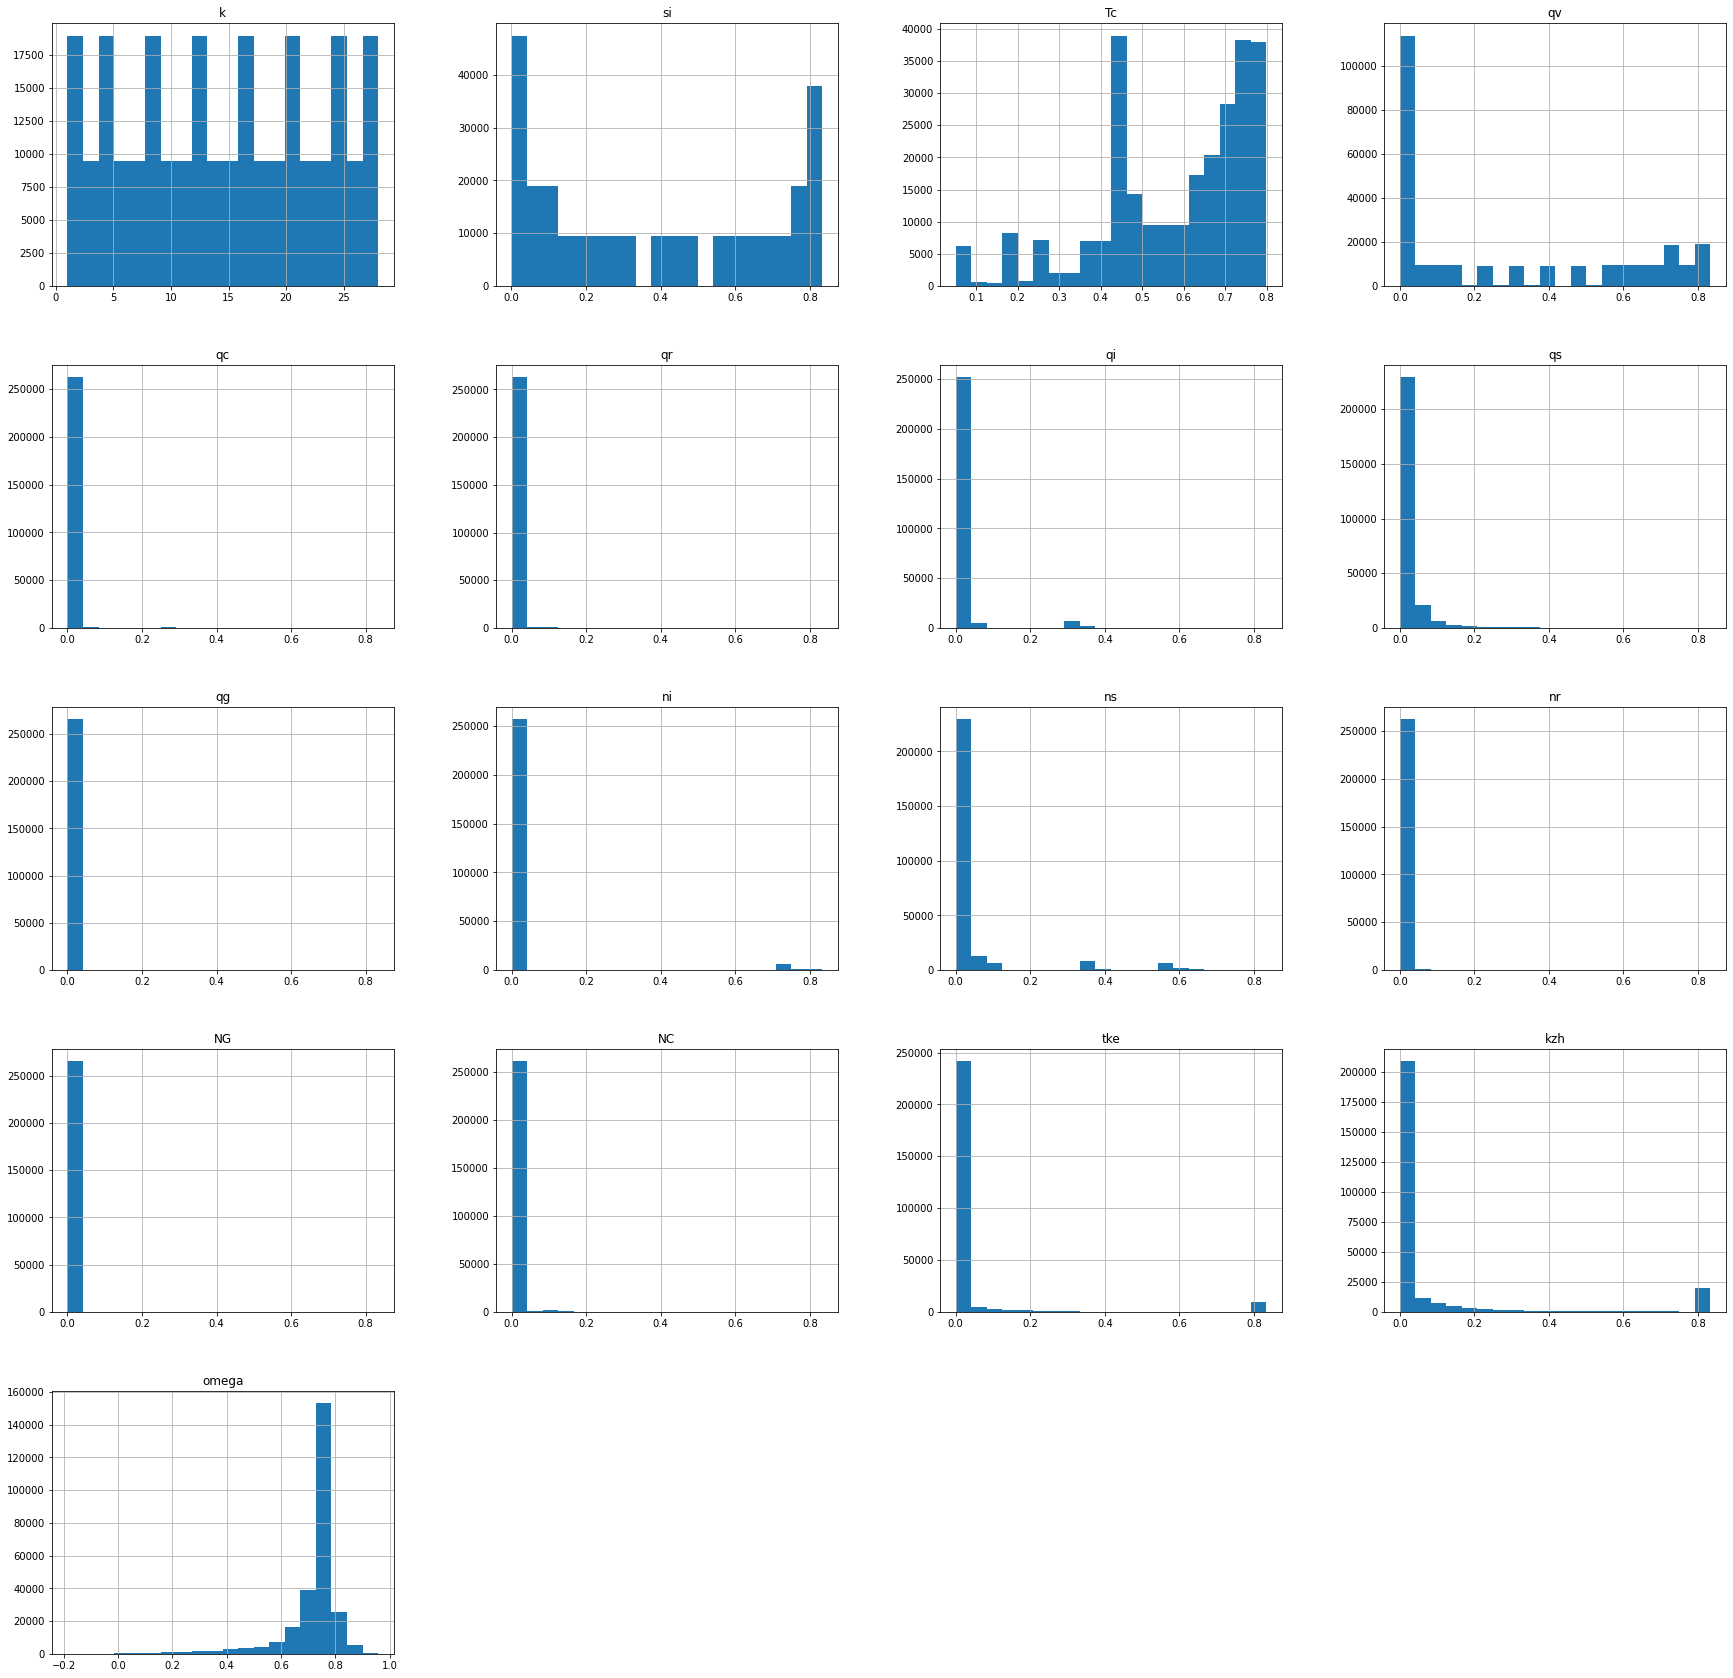

In [ ]:
# Variáveis de Entrada
_ = all_examples.hist(bins=20, figsize=(30, 30), xlabelsize=10)

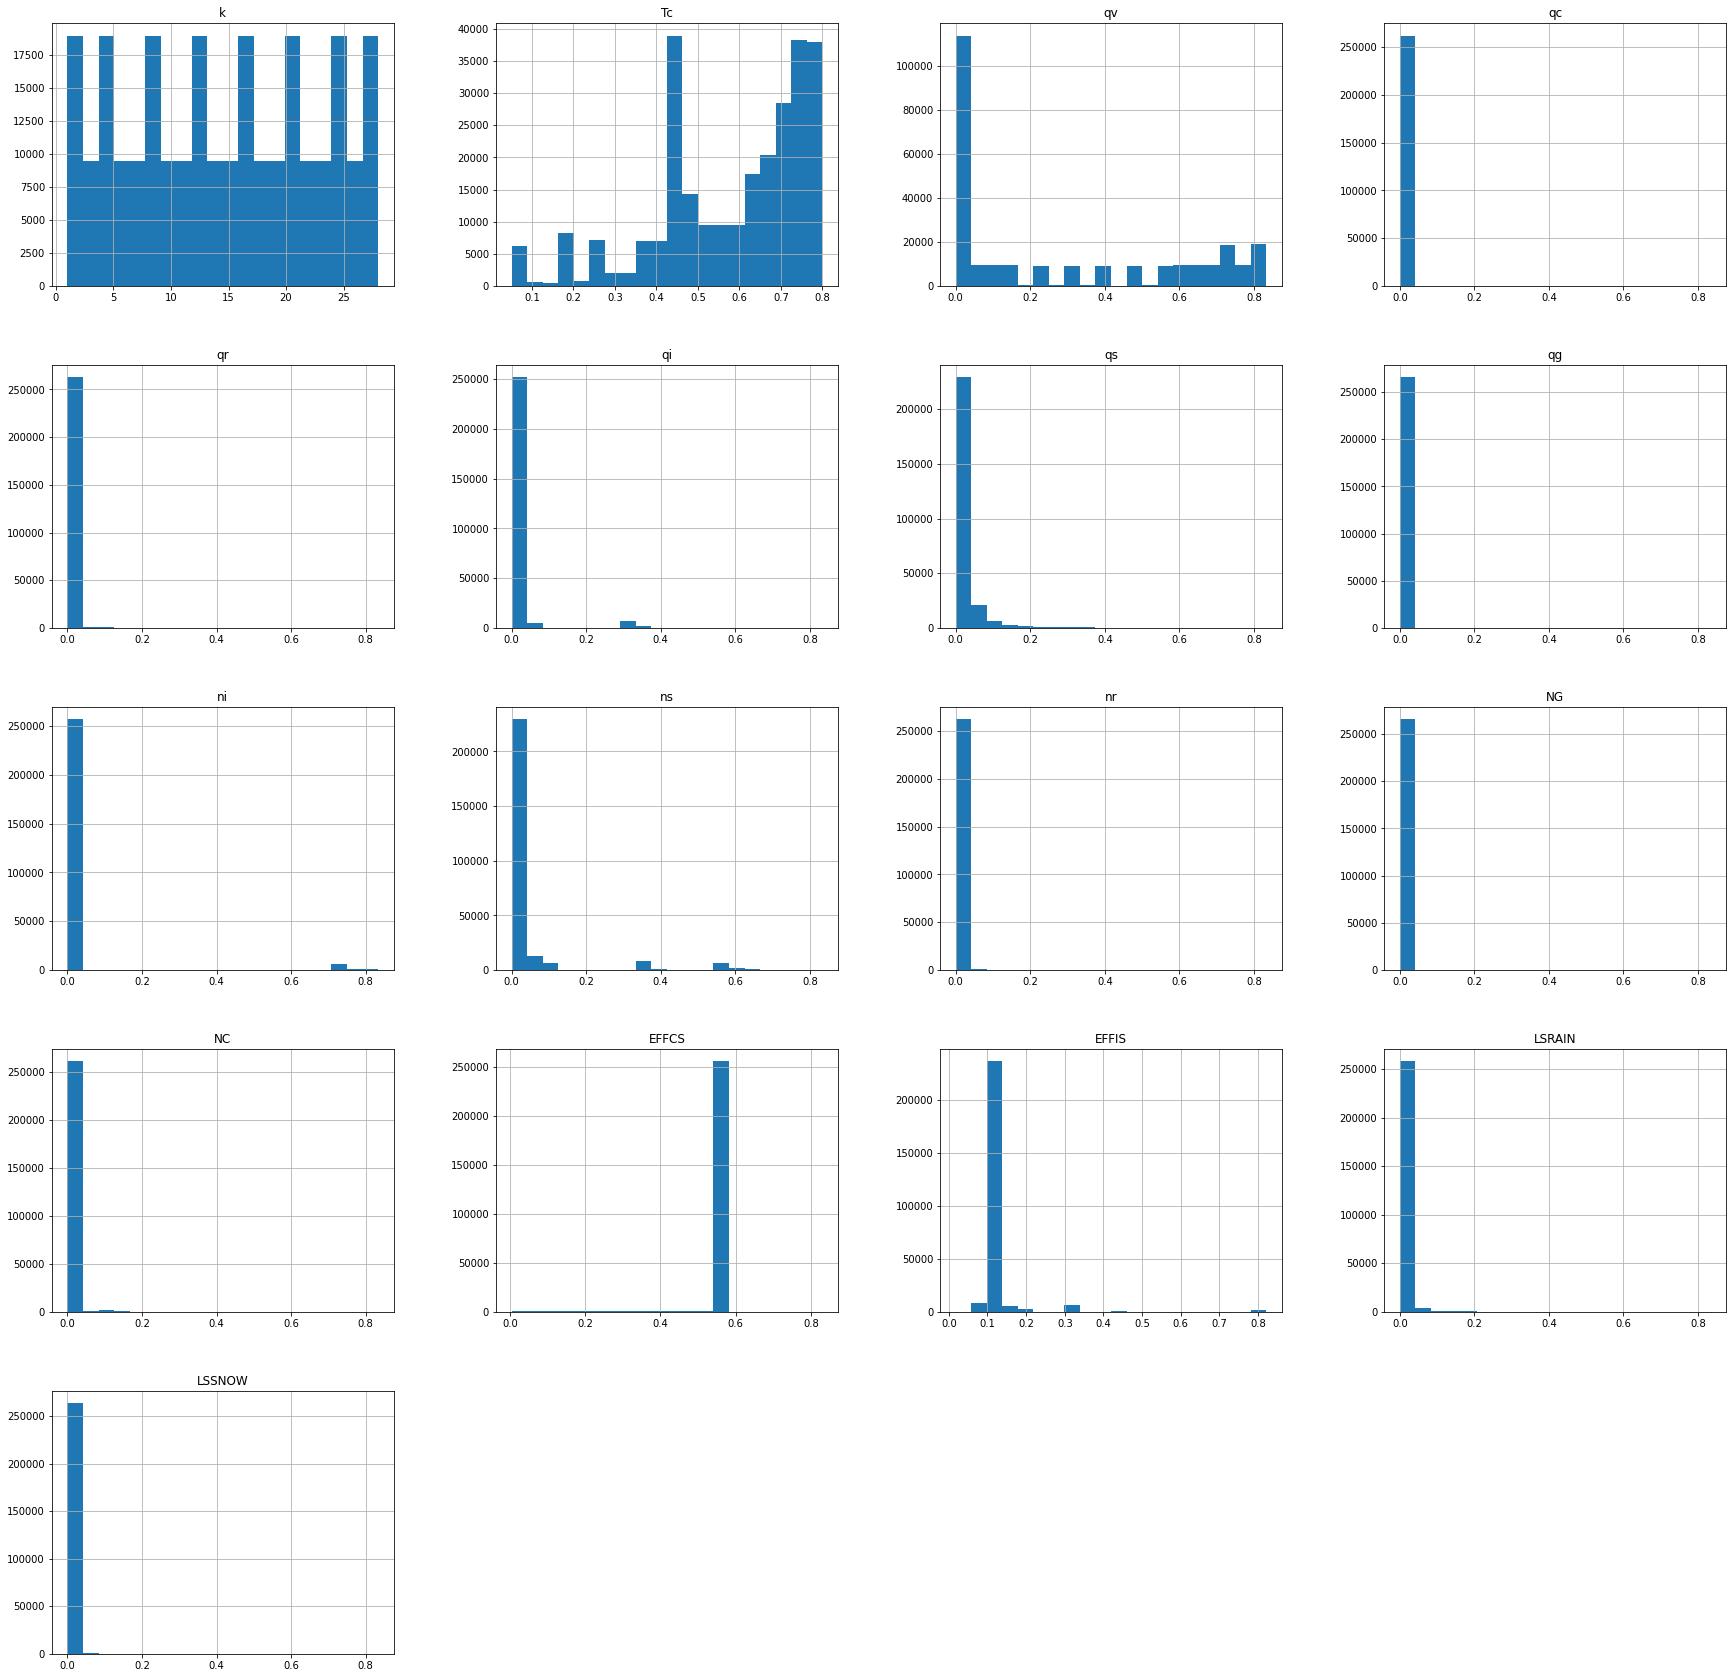

In [ ]:
_ = all_targets.hist(bins=20, figsize=(30, 30), xlabelsize=10)

## Dados de Entrada x Dados de Saída

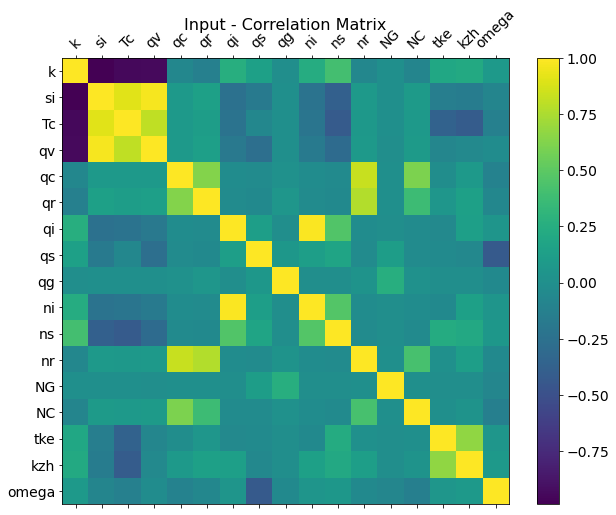

In [ ]:
# Matrix de correlação - entrada
f = plt.figure(figsize=(10, 8))
plt.matshow(all_examples.corr(), fignum=f.number)
plt.xticks(range(all_examples.select_dtypes(['number']).shape[1]), all_examples.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(all_examples.select_dtypes(['number']).shape[1]), all_examples.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Input - Correlation Matrix', fontsize=16);

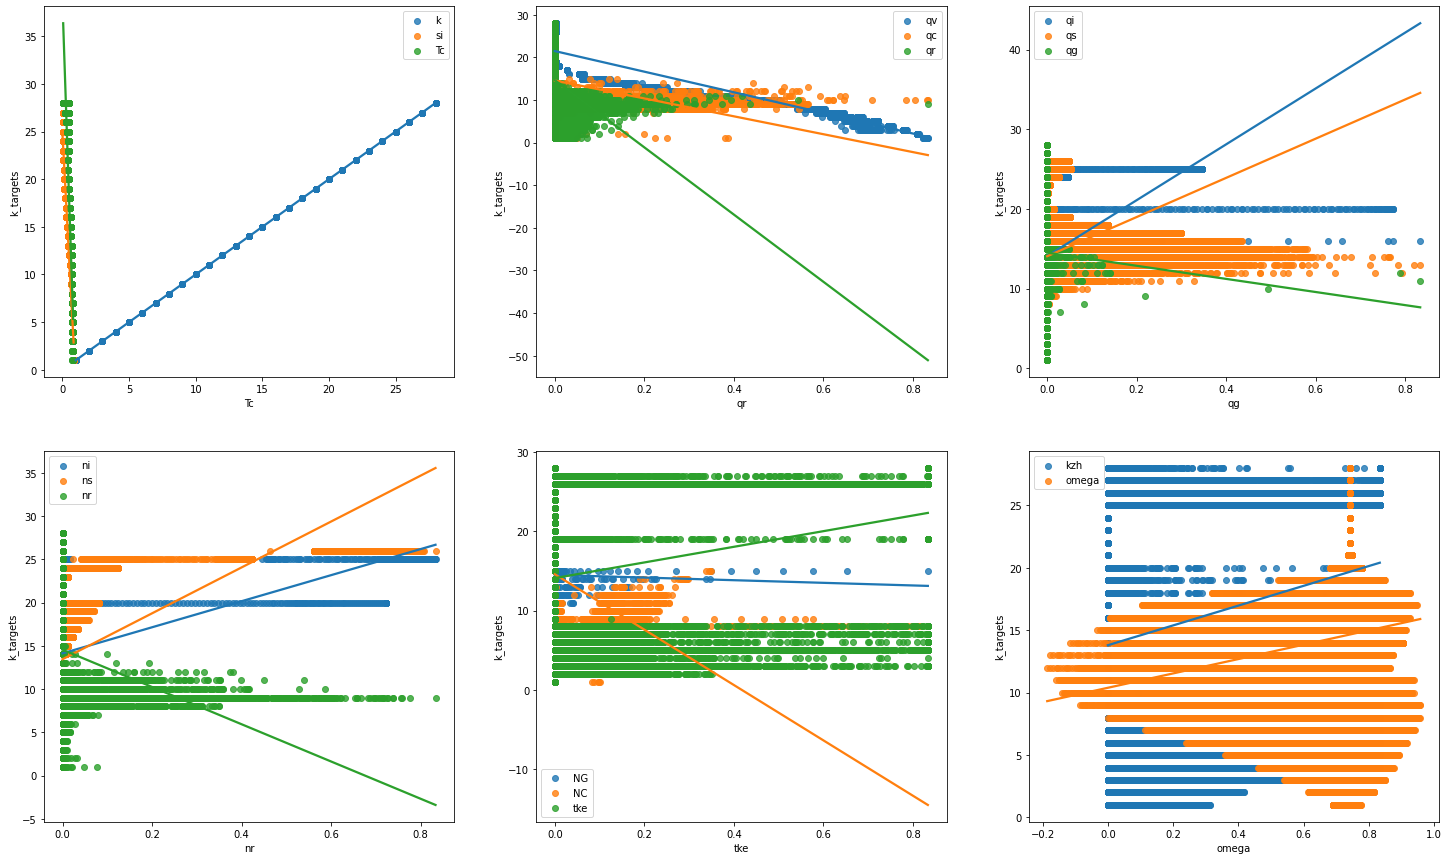

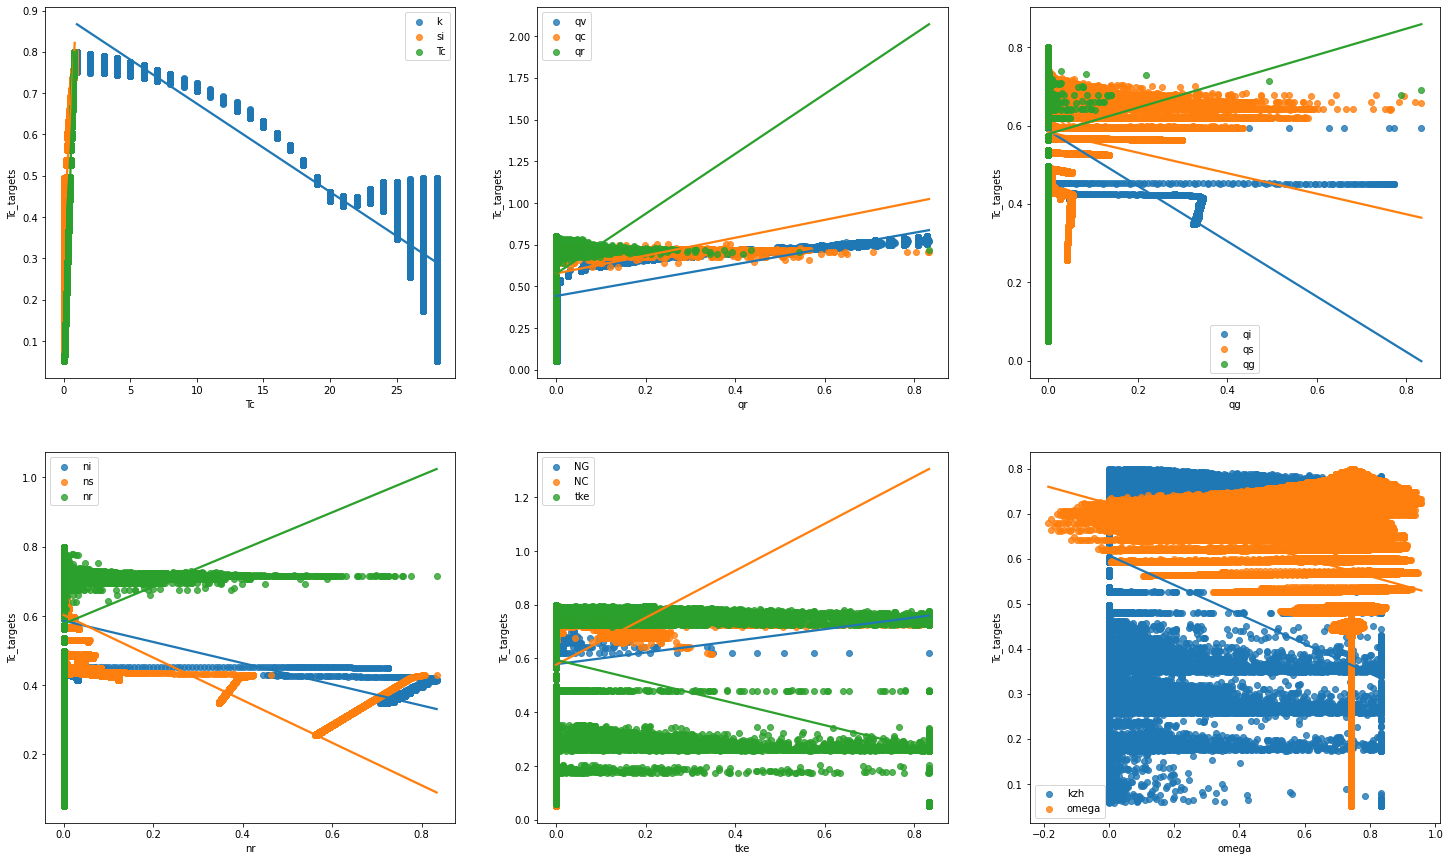

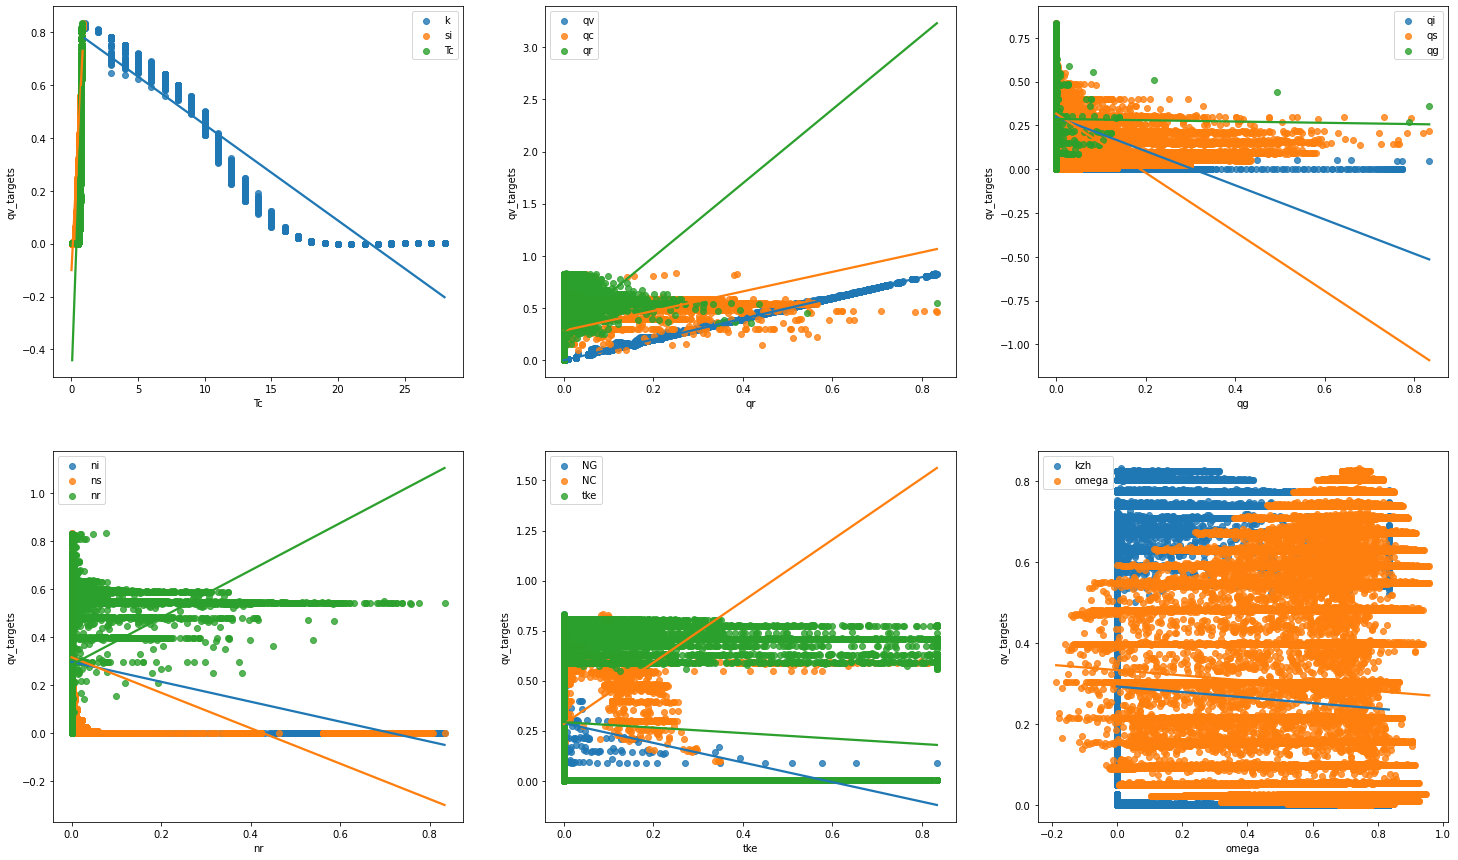

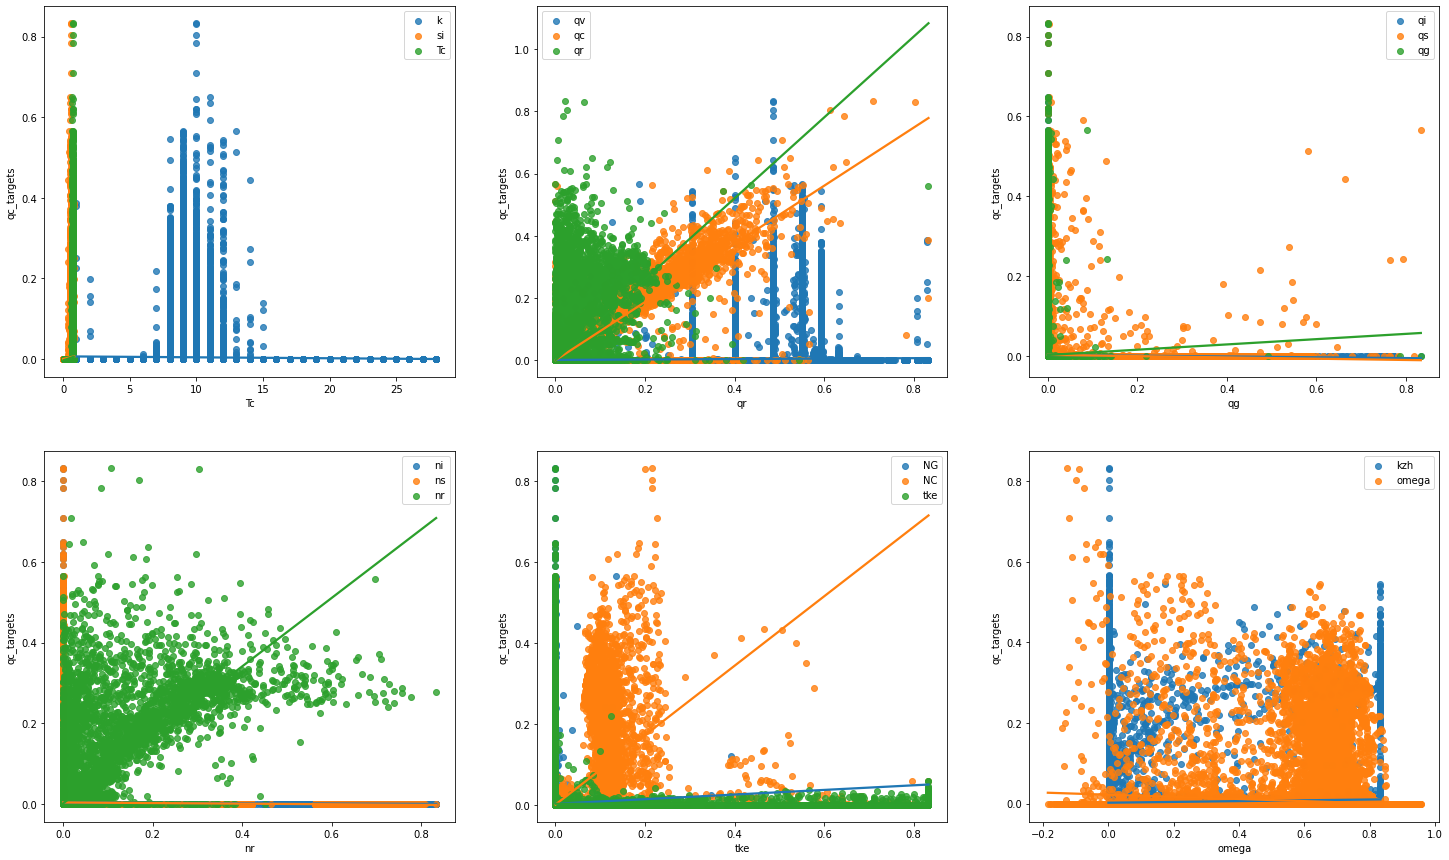

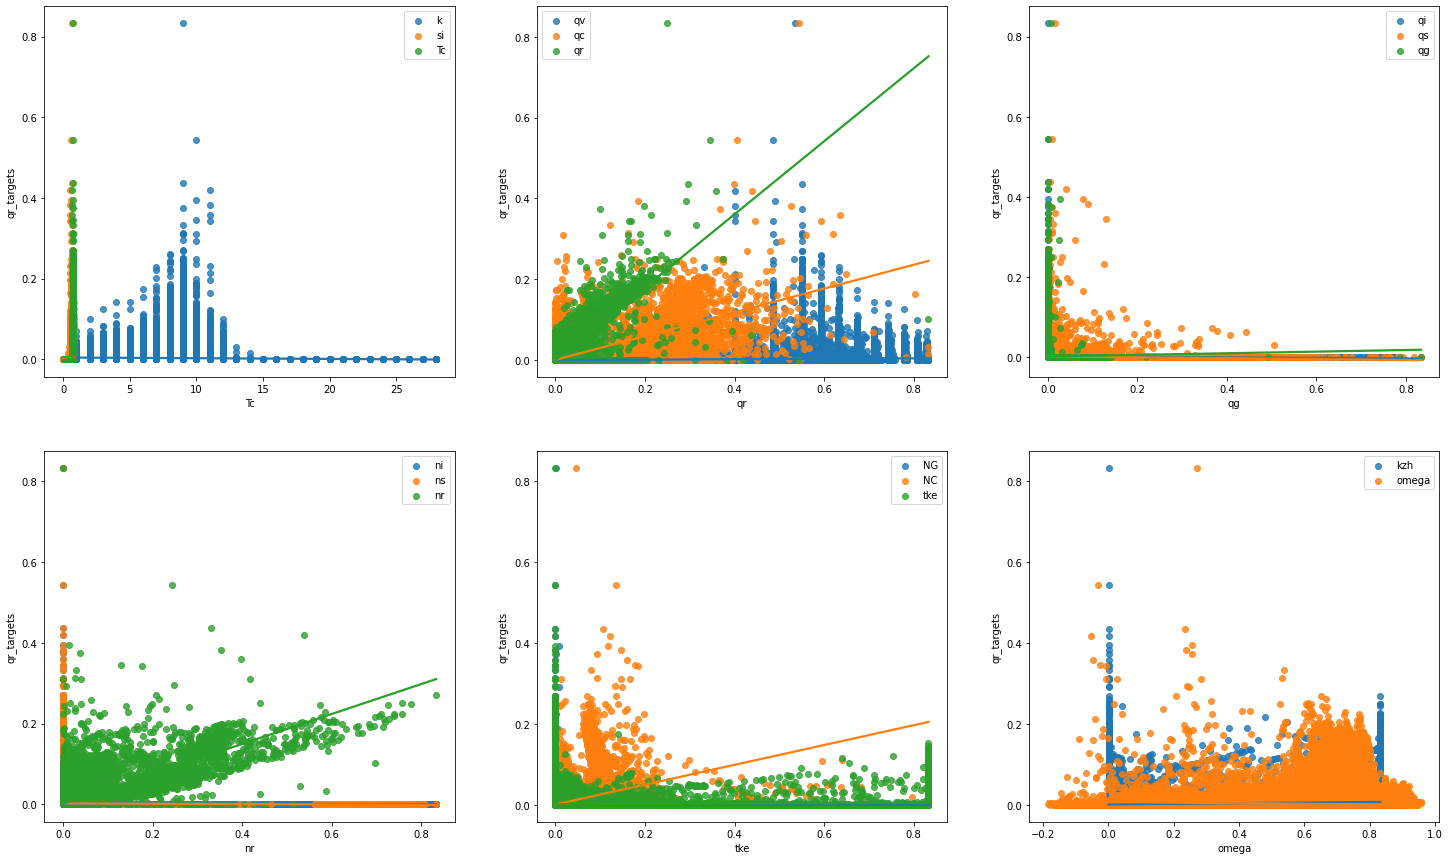

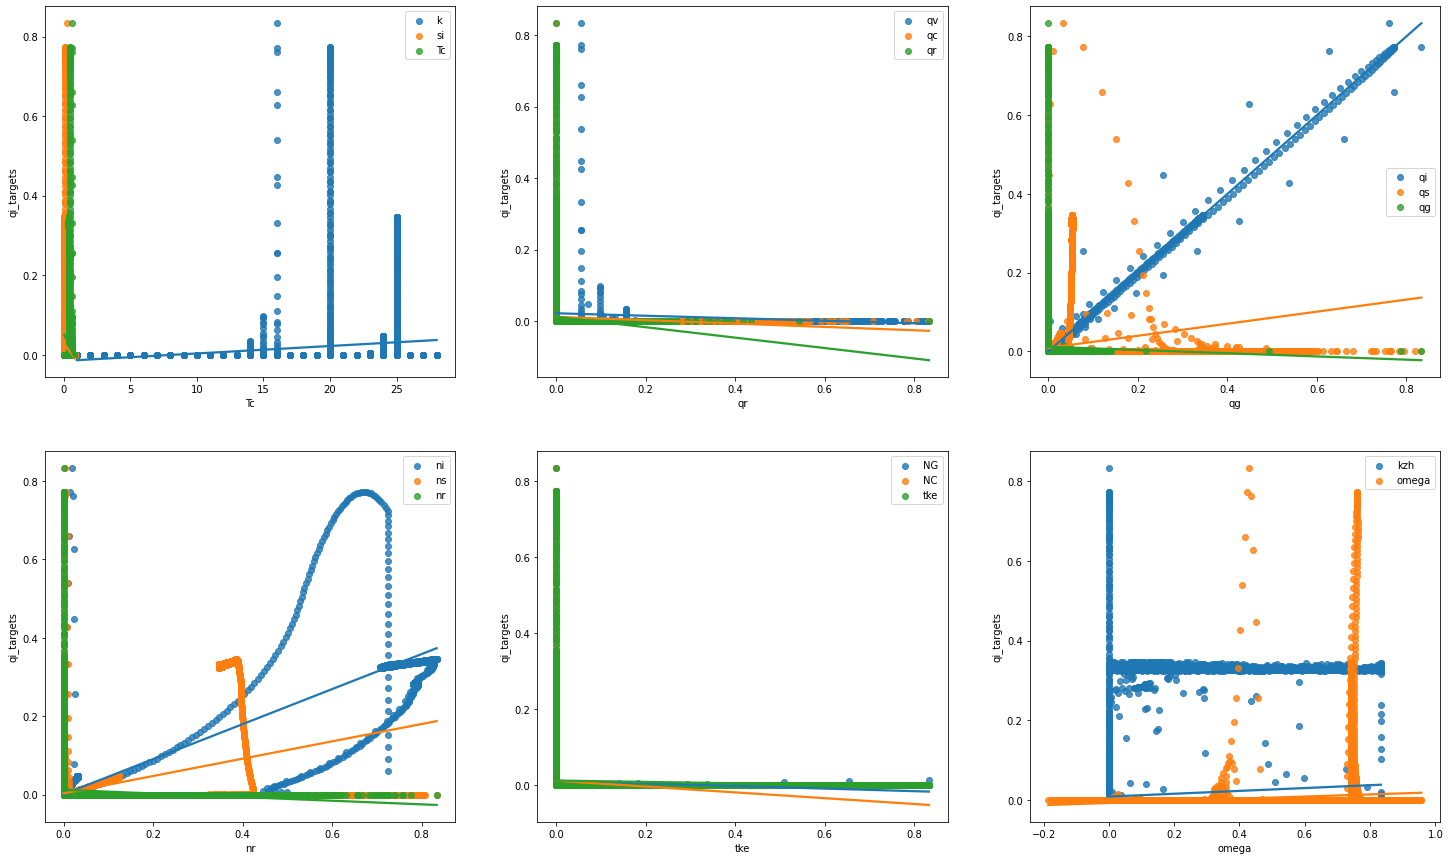

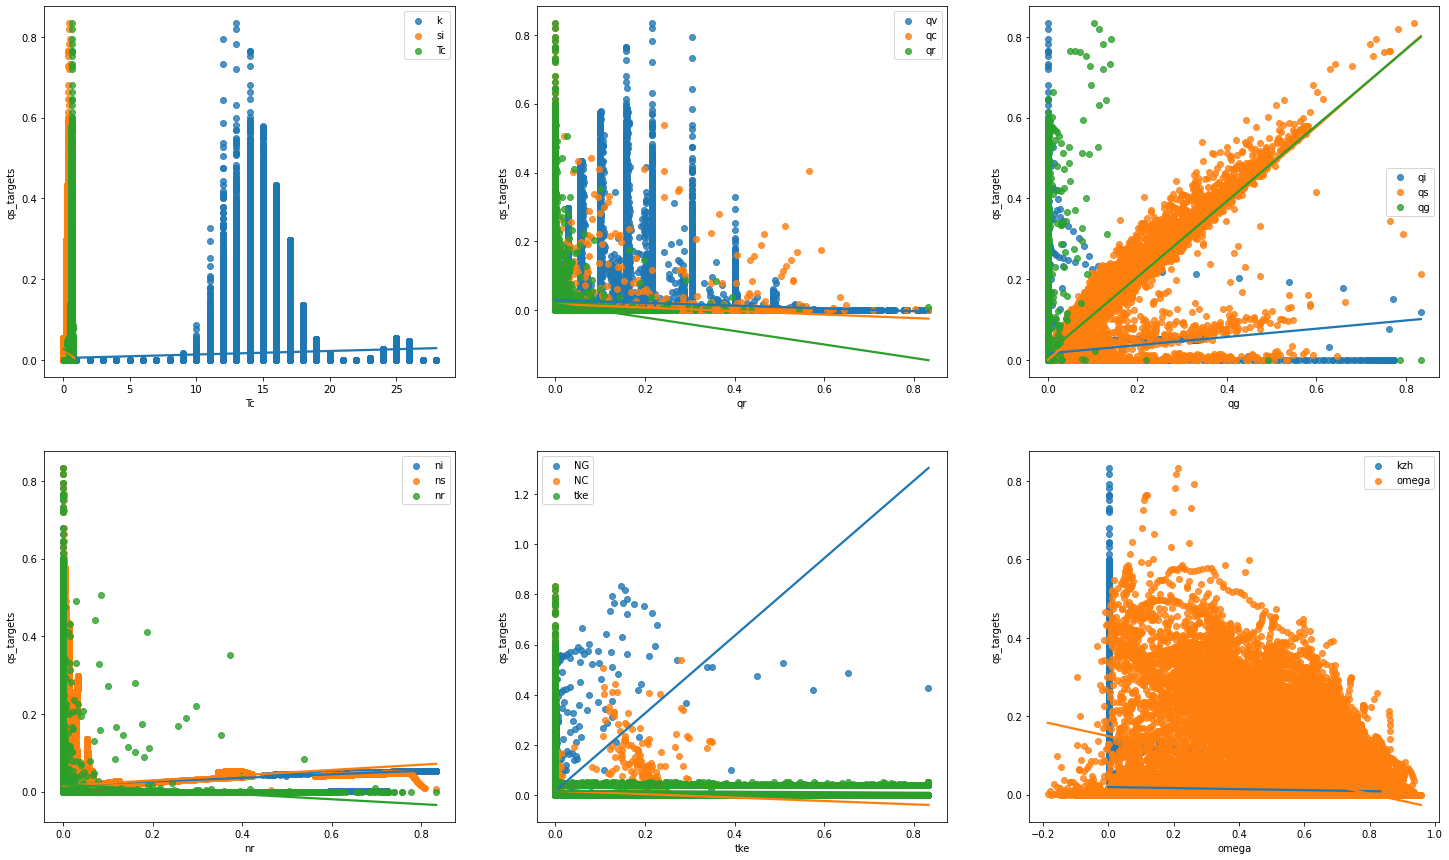

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Função usada para definir a quantidade de gráficos na largura e altura
# que melhor se aproxima de um quadrado

def BestNearFactorPair(n):
    if n % 2 != 0:
        n += 1
    for i in range(1, int(pow(n, 1 / 2)) + 1):
        if n % i == 0:
            w, h = i, int(n/i)
    return w, h


row_ex, col_ex = all_examples.shape
row_tg, col_tg = all_targets.shape

w, h = BestNearFactorPair(math.floor(col_ex/3))
ax_row = 0
ax_col = 0

for column_tg in all_targets.columns:
    dados_analise = all_examples.copy()
    column_name = column_tg
    if column_name in dados_analise:
      column_name += '_targets'
    dados_analise.insert(col_ex, column_name, all_targets[column_tg])
    fig, axes  =  plt.subplots(w, h, figsize=(25,15))
    k = 0
    for ax in axes.flat:
      cont = 1 
      column_ex = all_examples.columns
      while True:
       sns.regplot(x=column_ex[k], y=column_name, data=dados_analise, fit_reg=True, ci=None, ax=ax, label=column_ex[k])
       k += 1
       if cont == 3 or k >= len(column_ex):
         ax.legend()
         break
       cont += 1
    plt.show()  



## Bloxpot das variáveis por níveis

In [ ]:
# Imprime boxplot exibindo se contém valores (True) ou não (False) em cada nível
def bloxplot_levels(df):
  for key in df.columns.tolist():
    if key == "k": continue
    bp = df.boxplot(column=key, by="k", figsize=(25, 6))
    
    x = np.arange(1, k_max + 1)
    obsgroup = df[[key, 'k']].groupby(by="k")[key]
    noofobs = obsgroup.agg('sum').astype(bool)
    meanobs = obsgroup.agg('mean')

    for tick,label in zip(x,bp.get_xticklabels()):
      bp.text(x[tick-1], meanobs[tick], noofobs[tick], 
        horizontalalignment='center', color='blue' if noofobs[tick] == True else 'red' , weight='bold')
    plt.show()


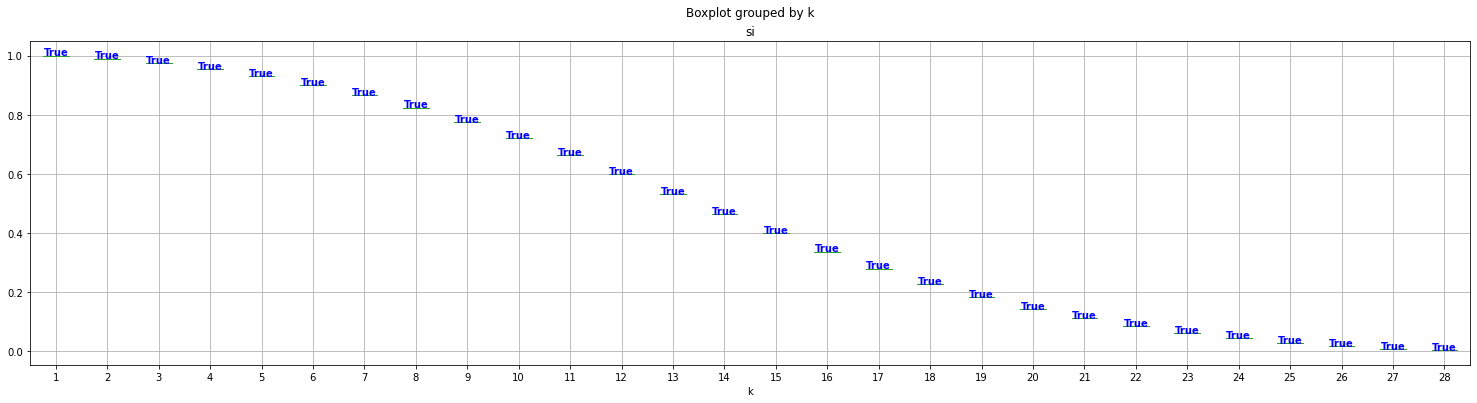

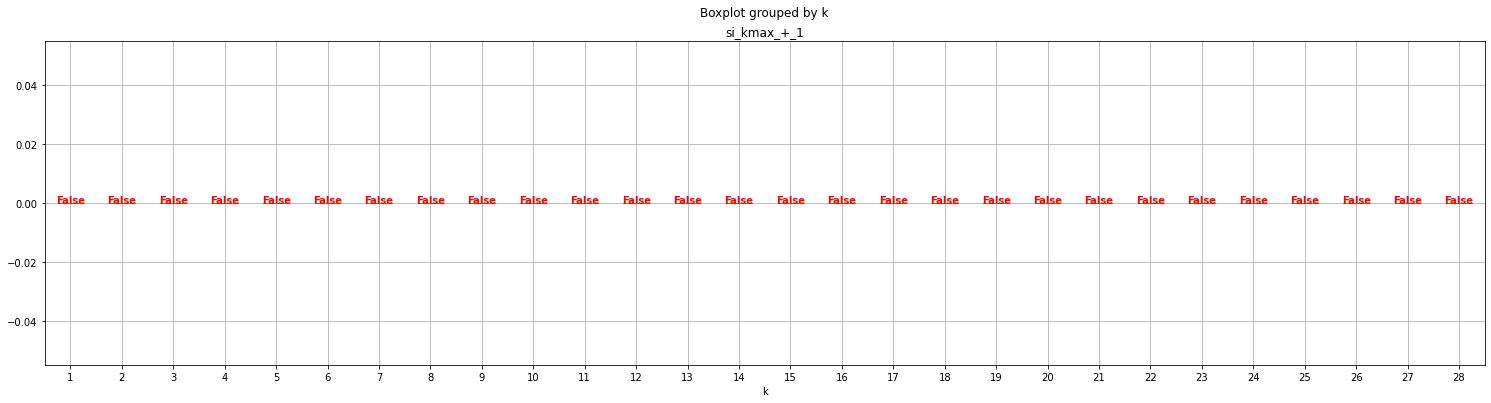

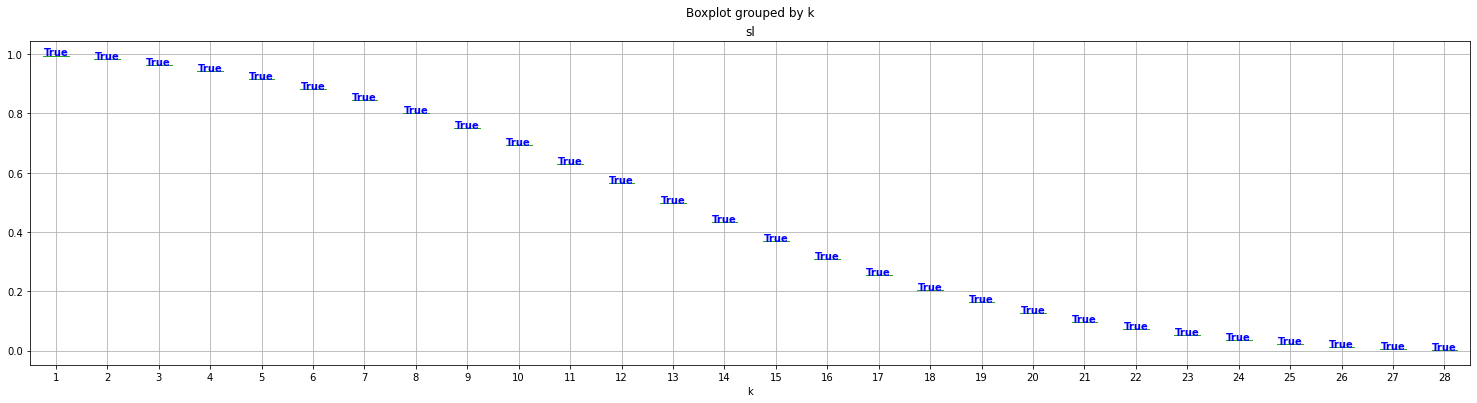

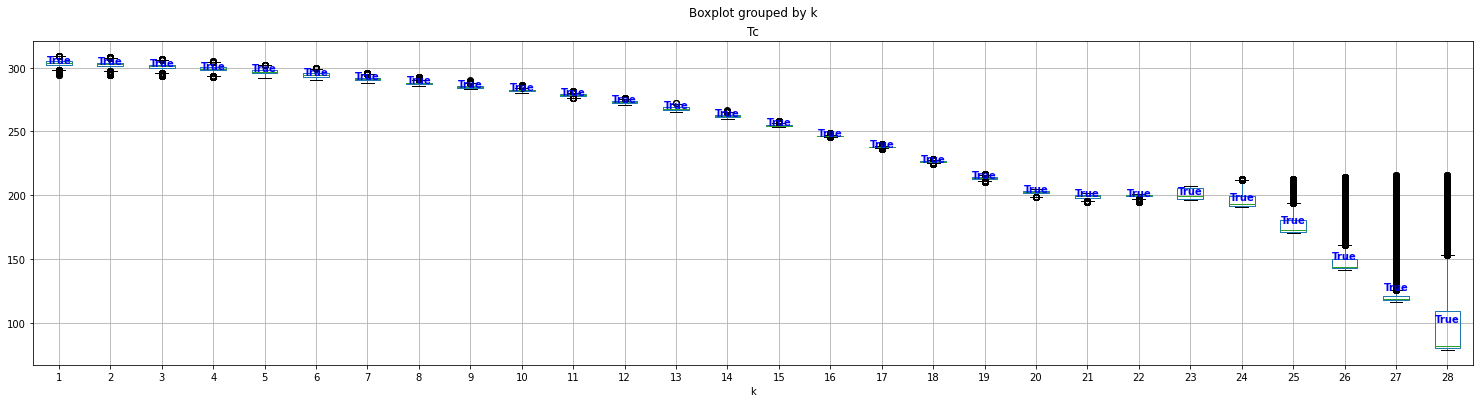

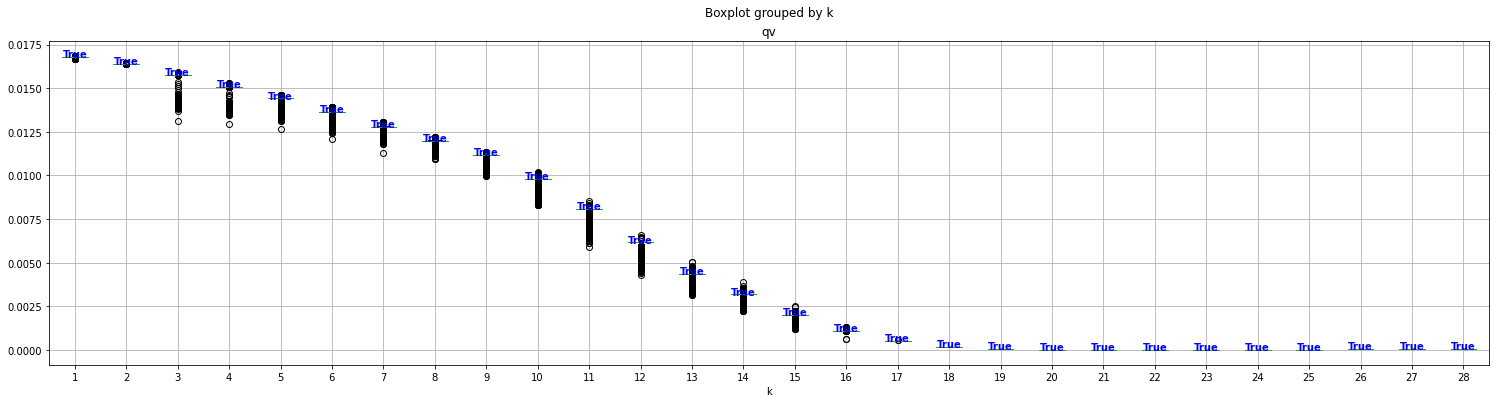

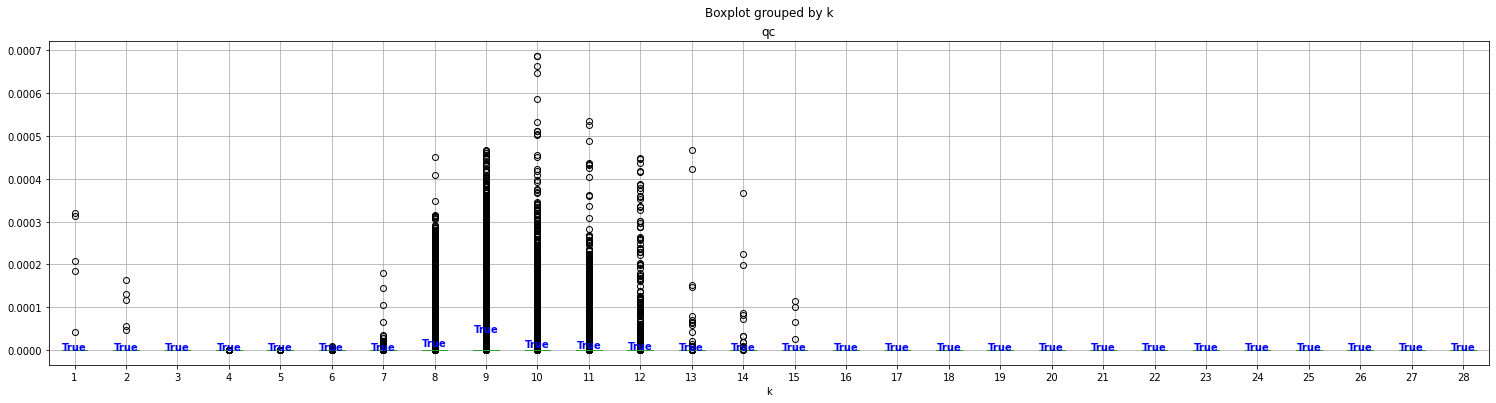

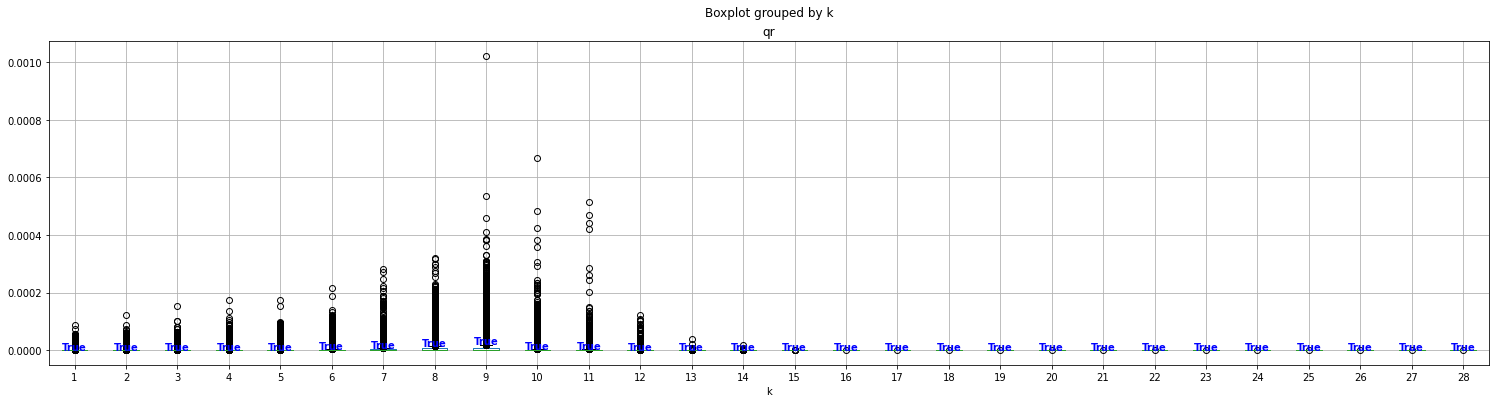

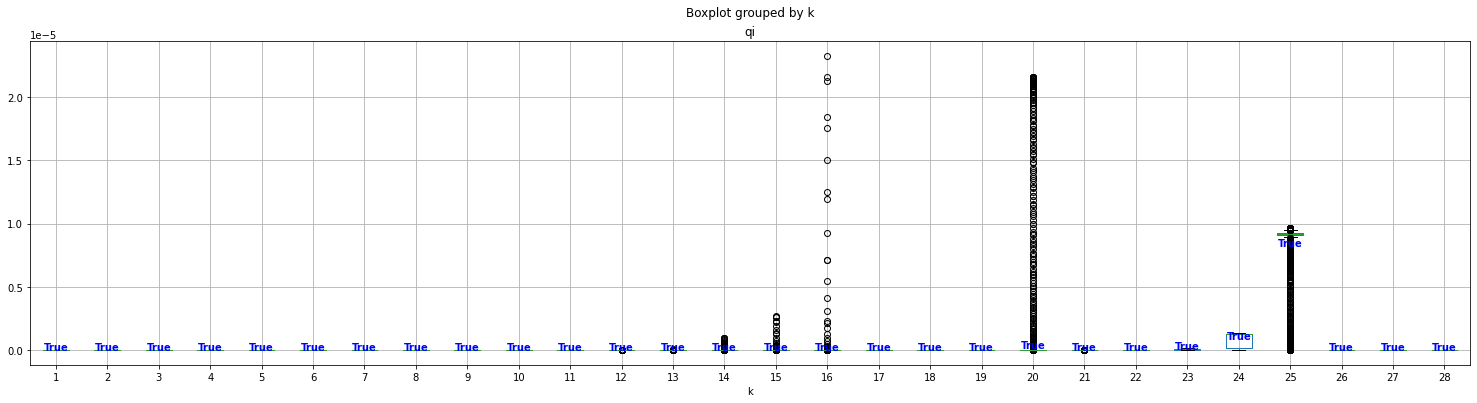

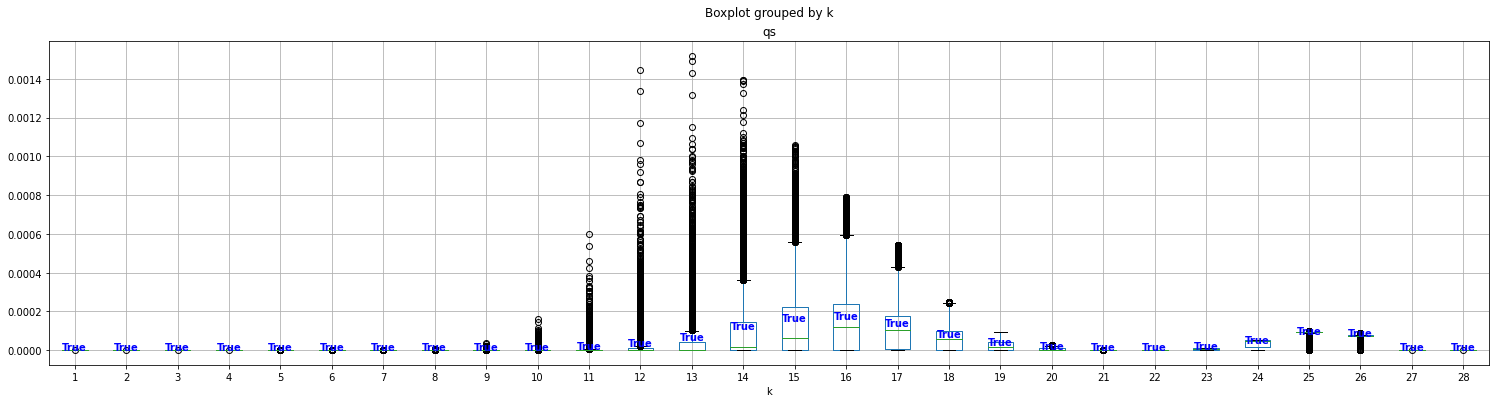

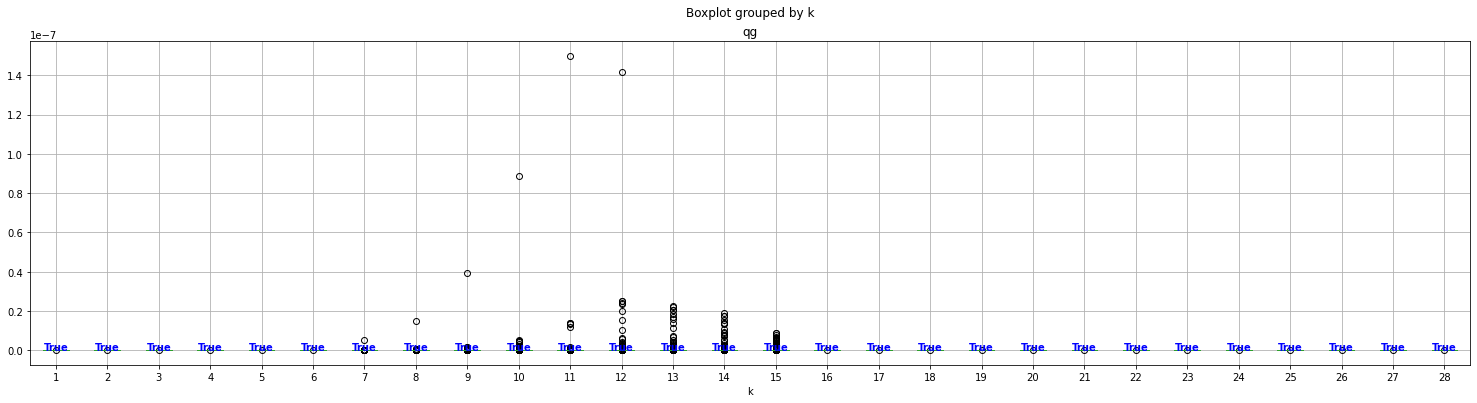

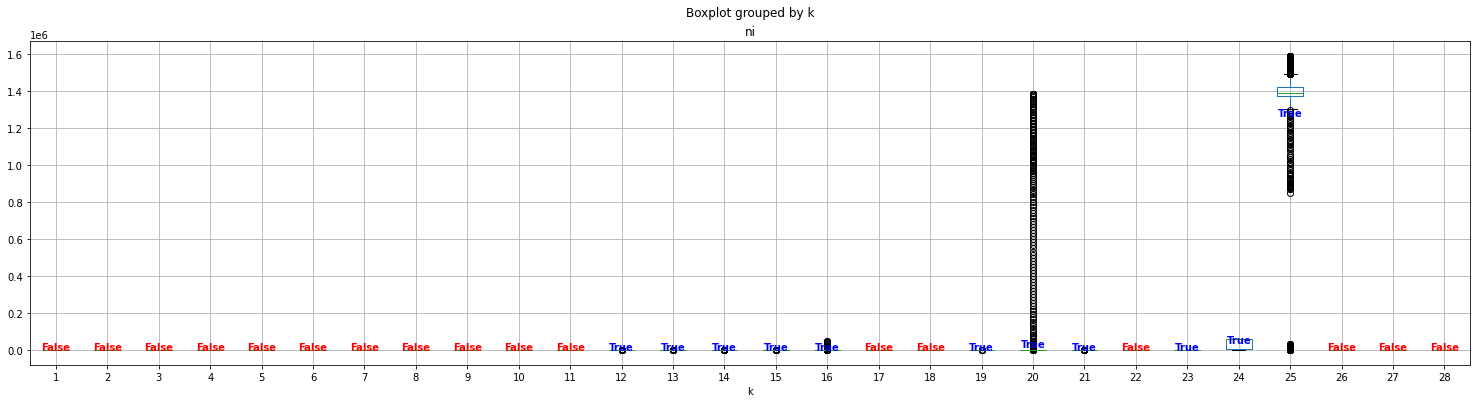

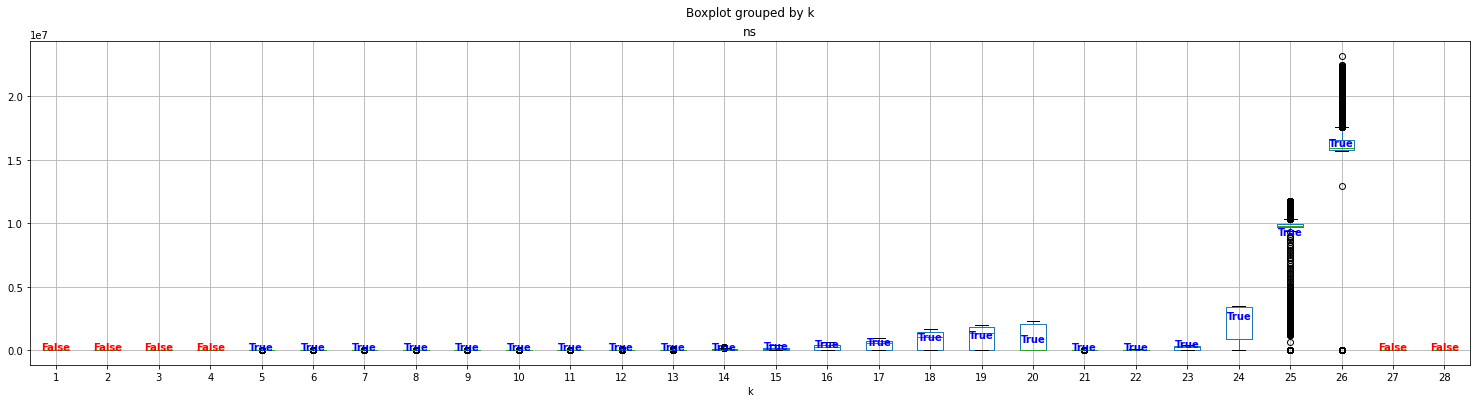

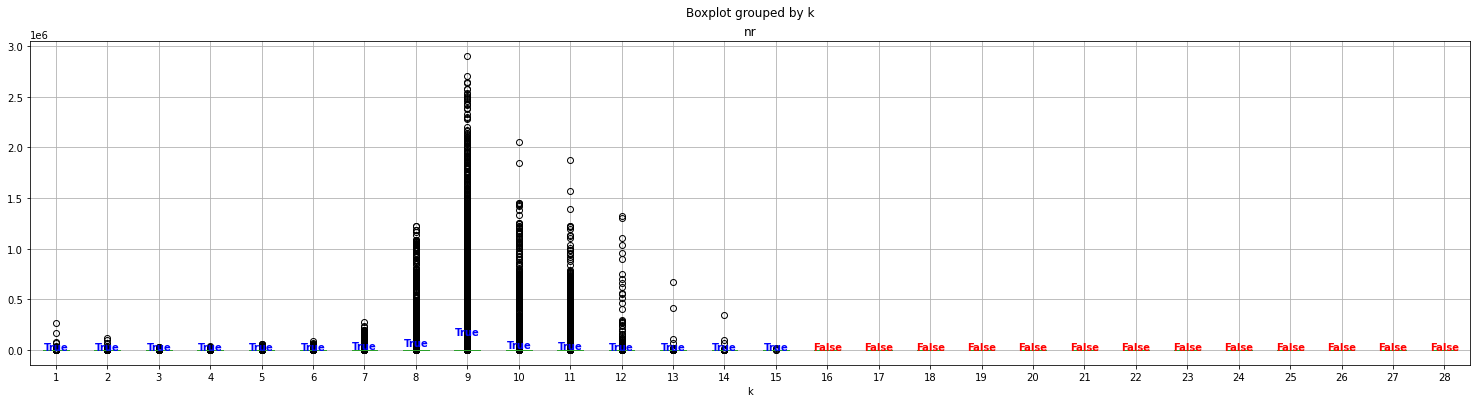

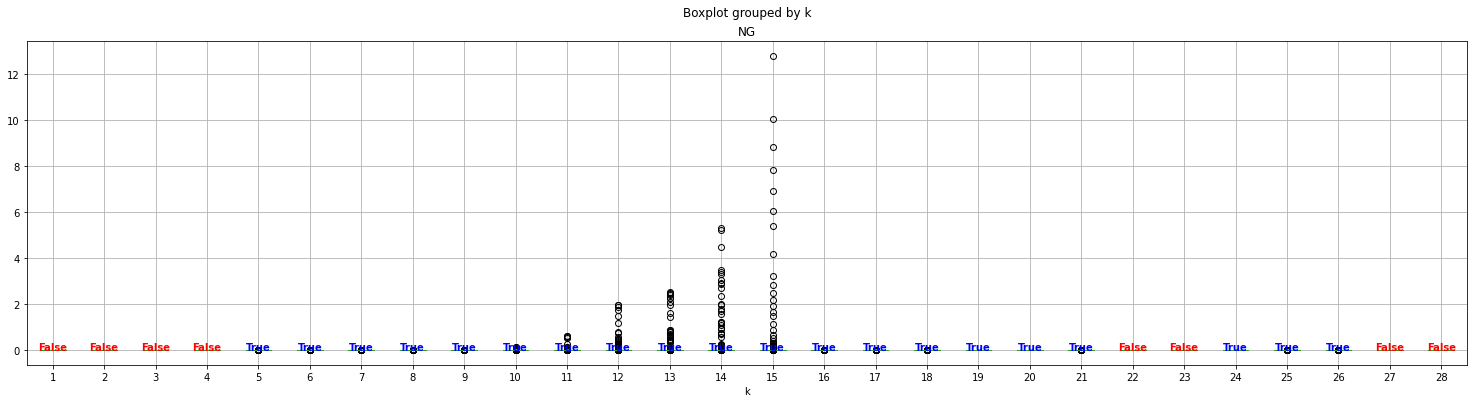

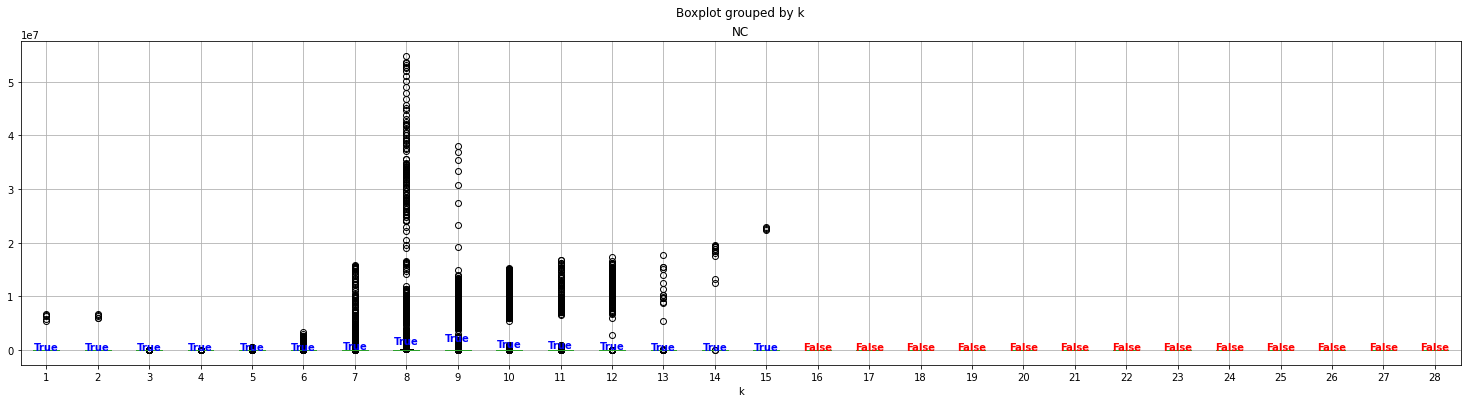

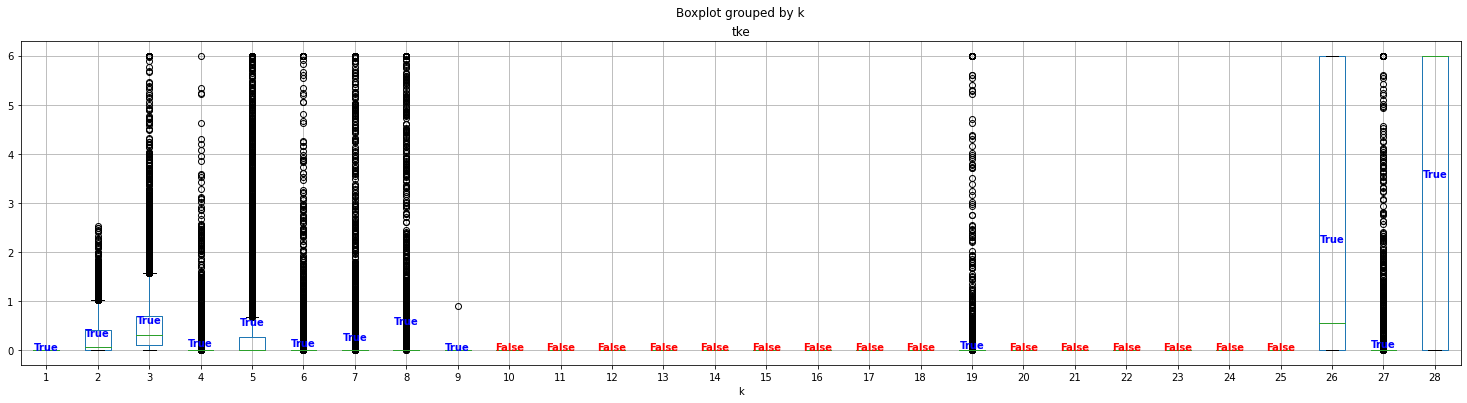

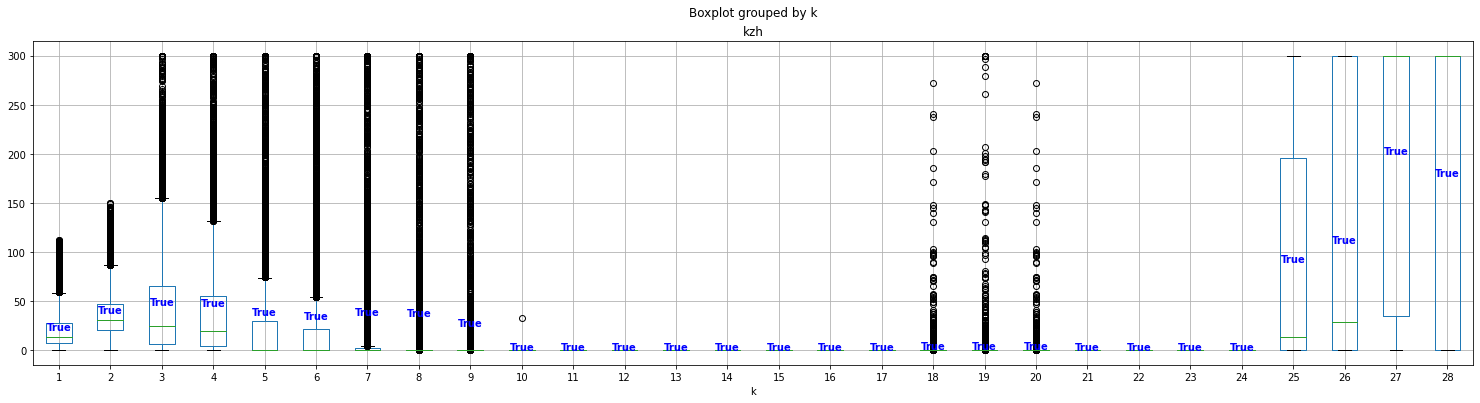

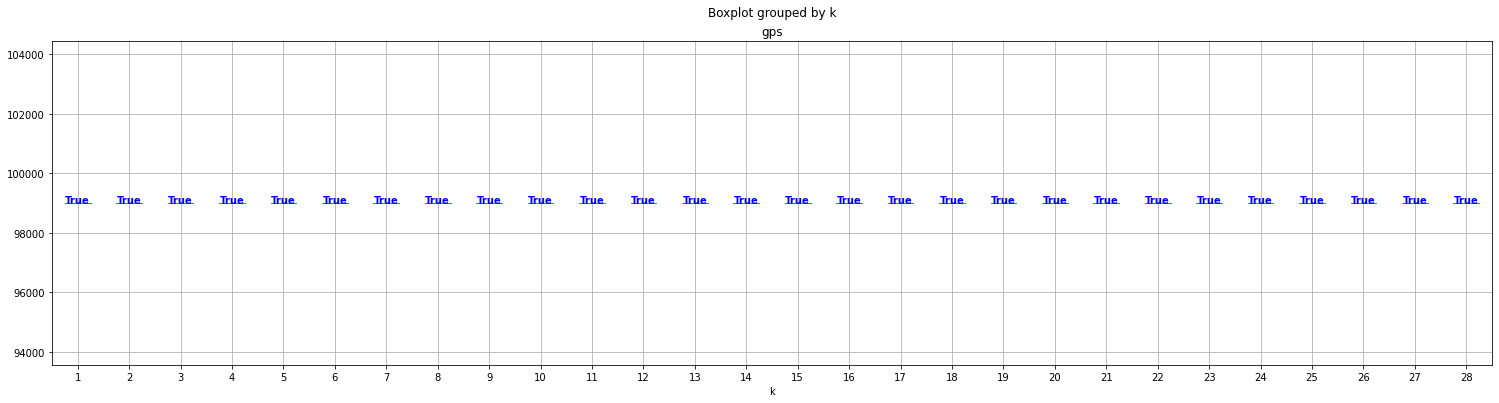

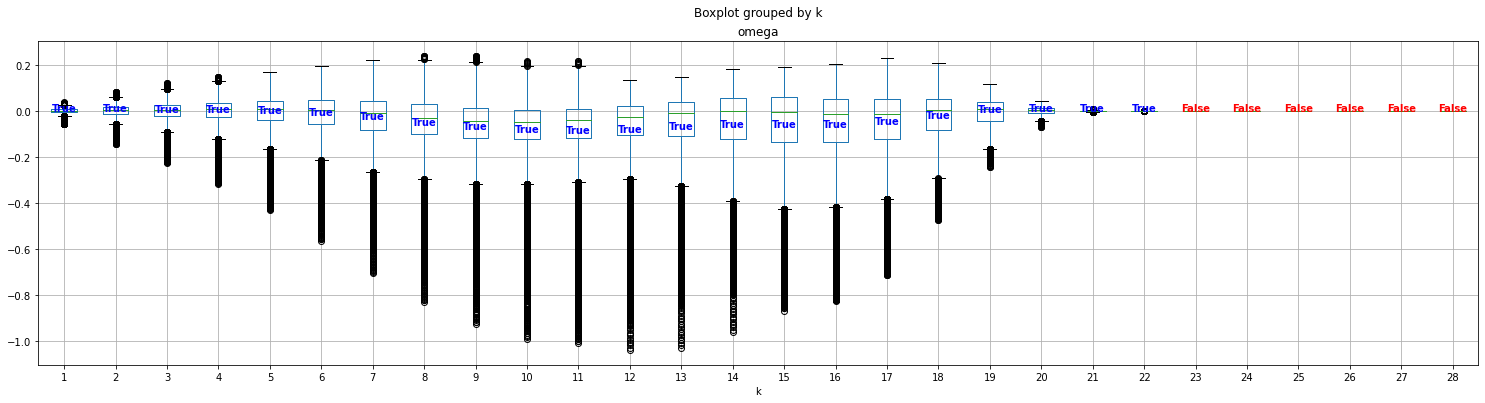

In [ ]:
bloxplot_levels(original_input_df)

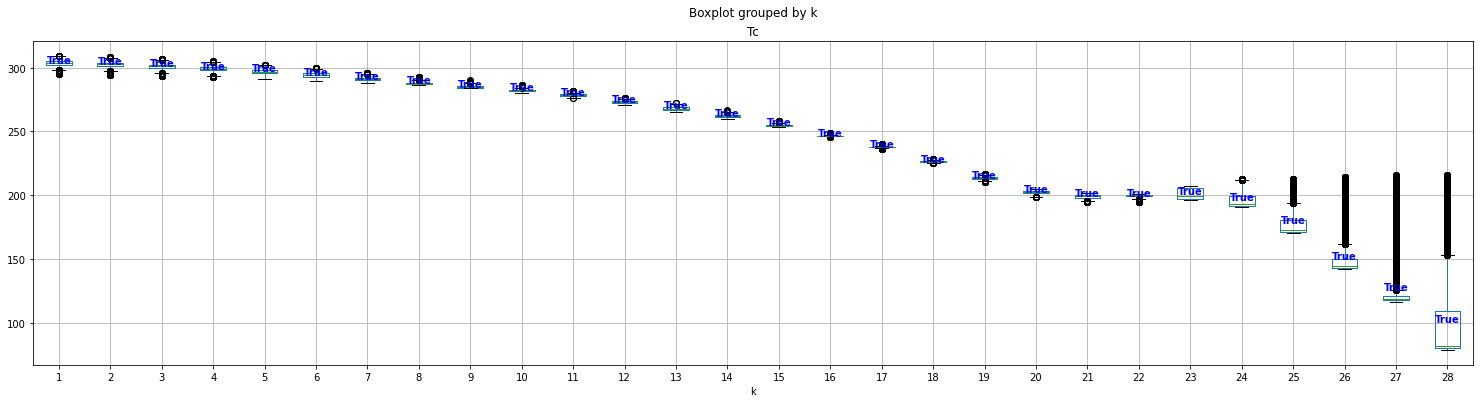

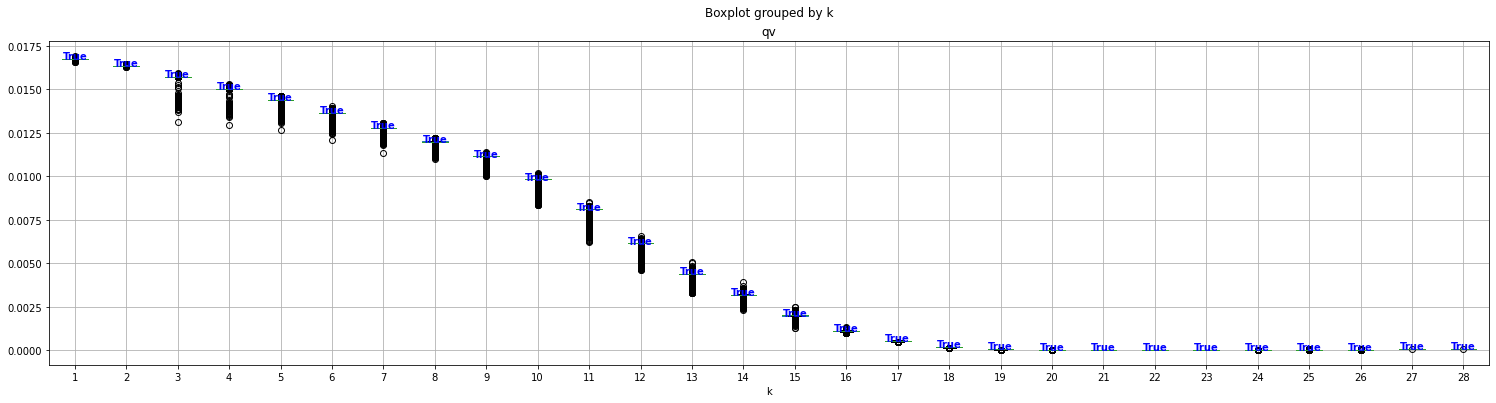

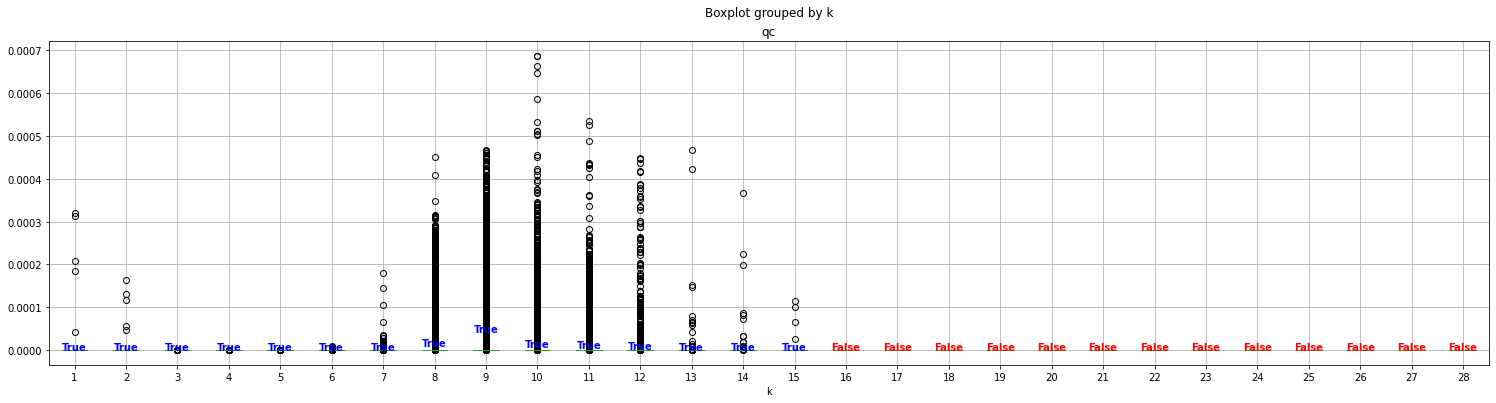

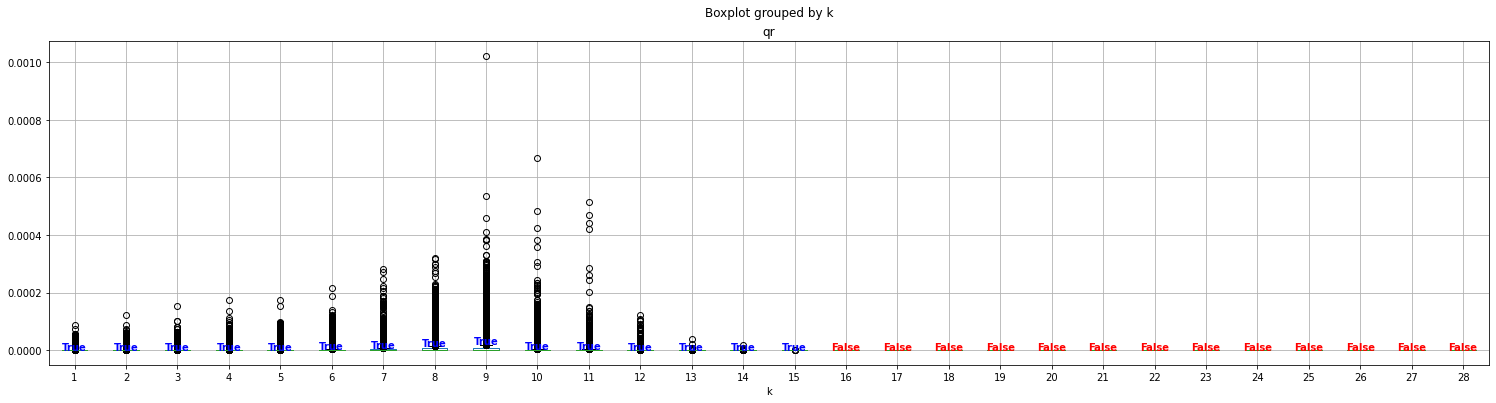

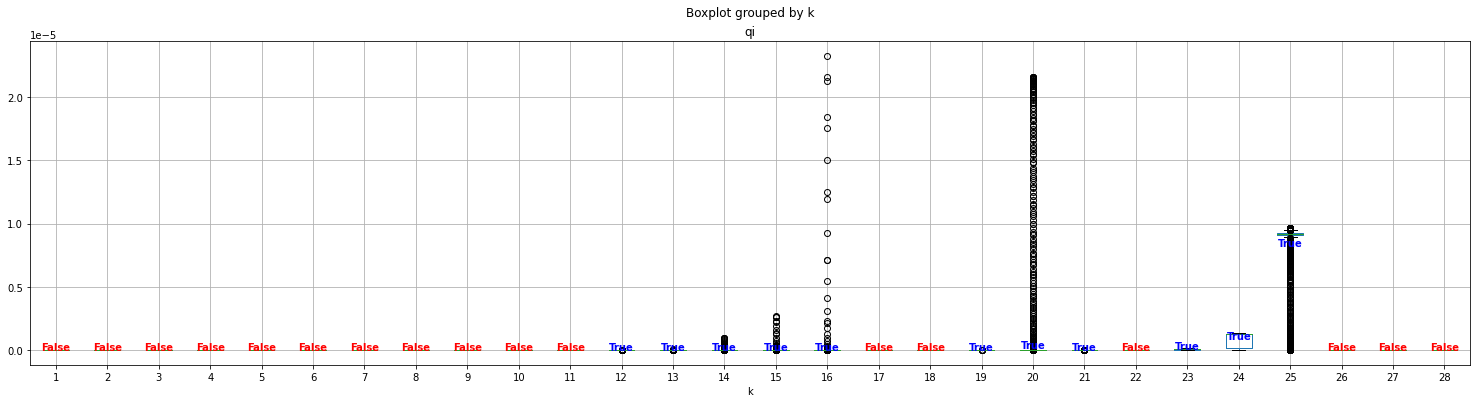

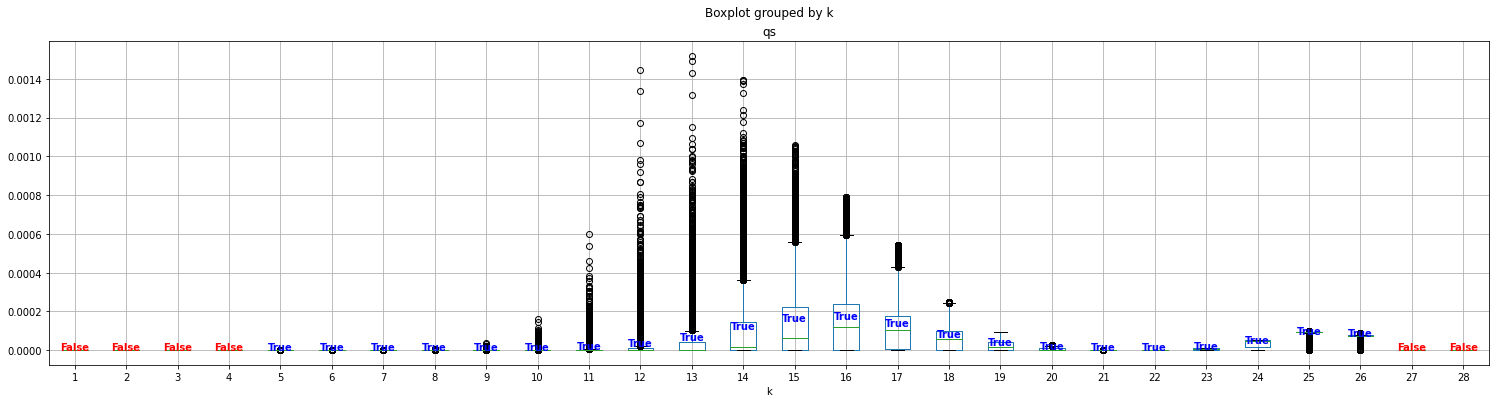

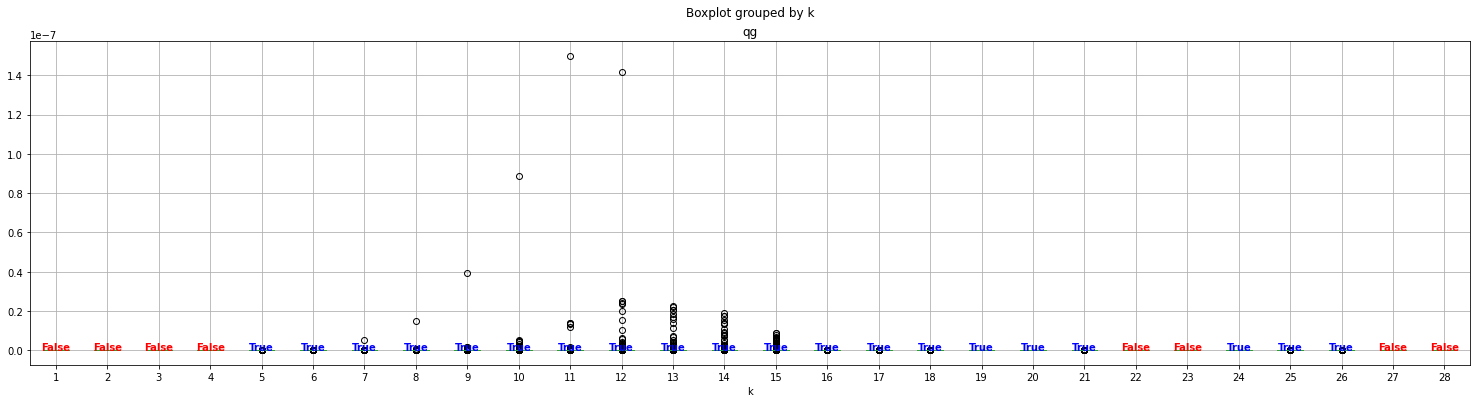

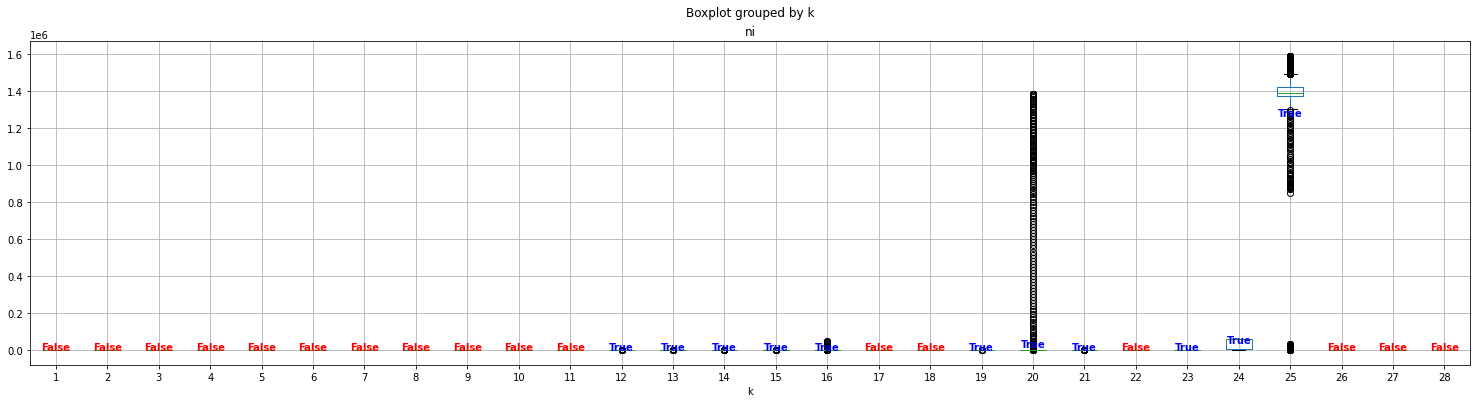

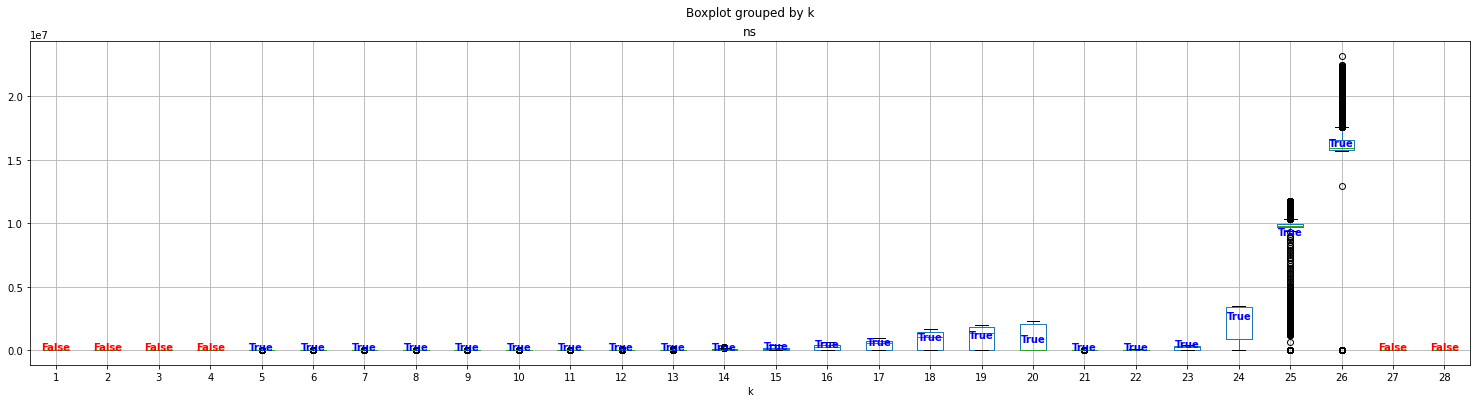

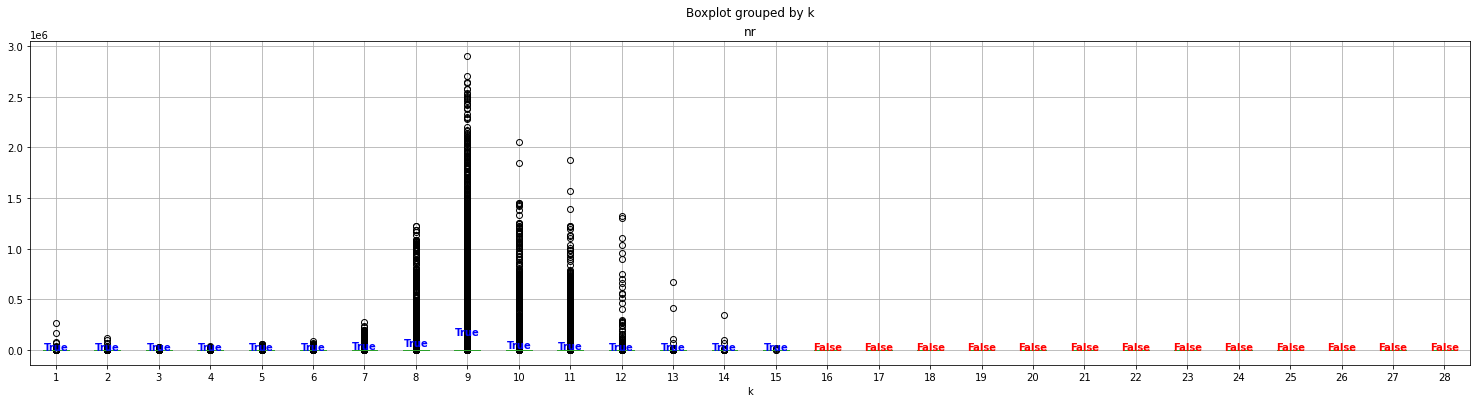

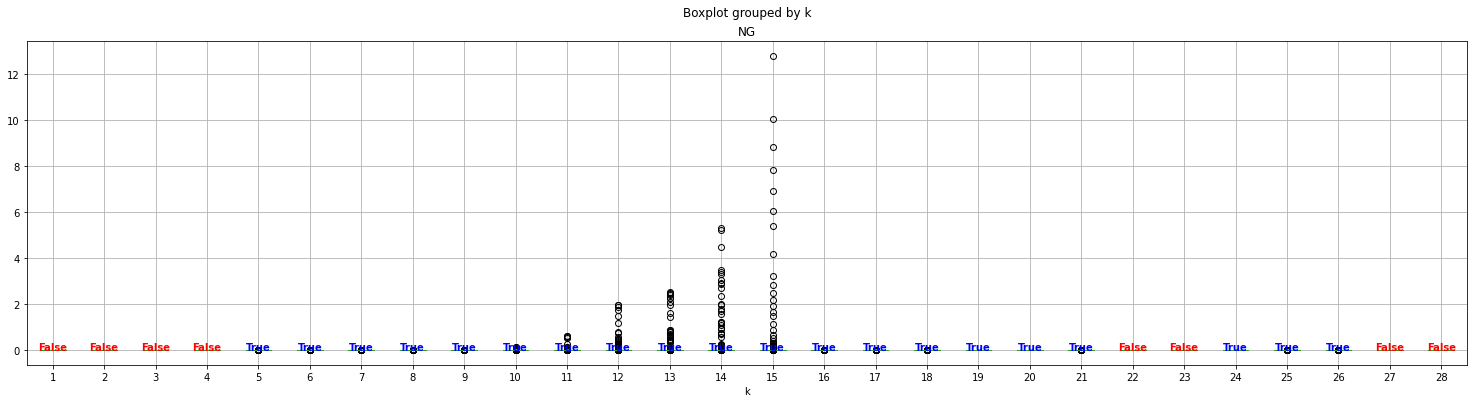

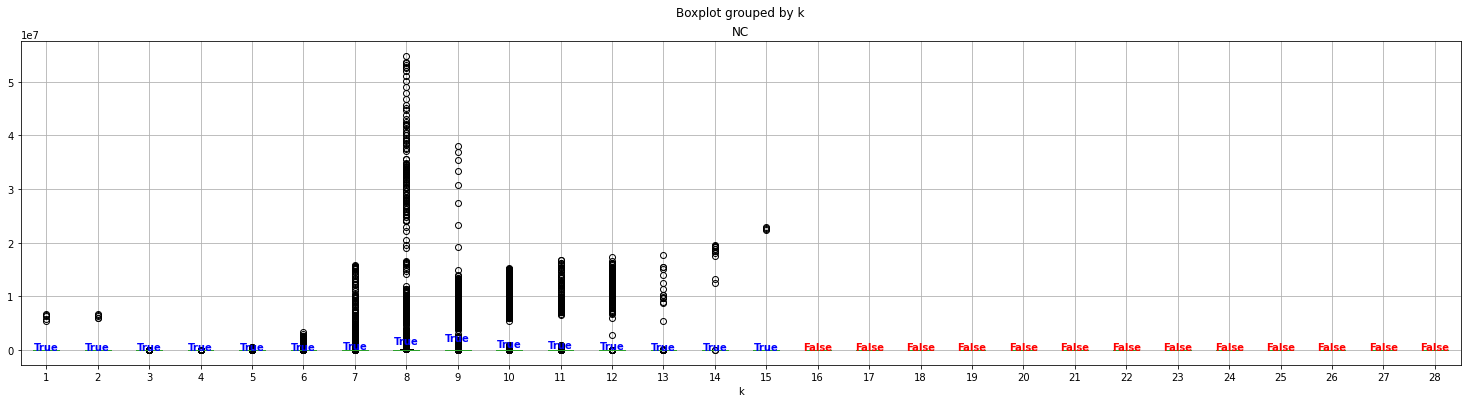

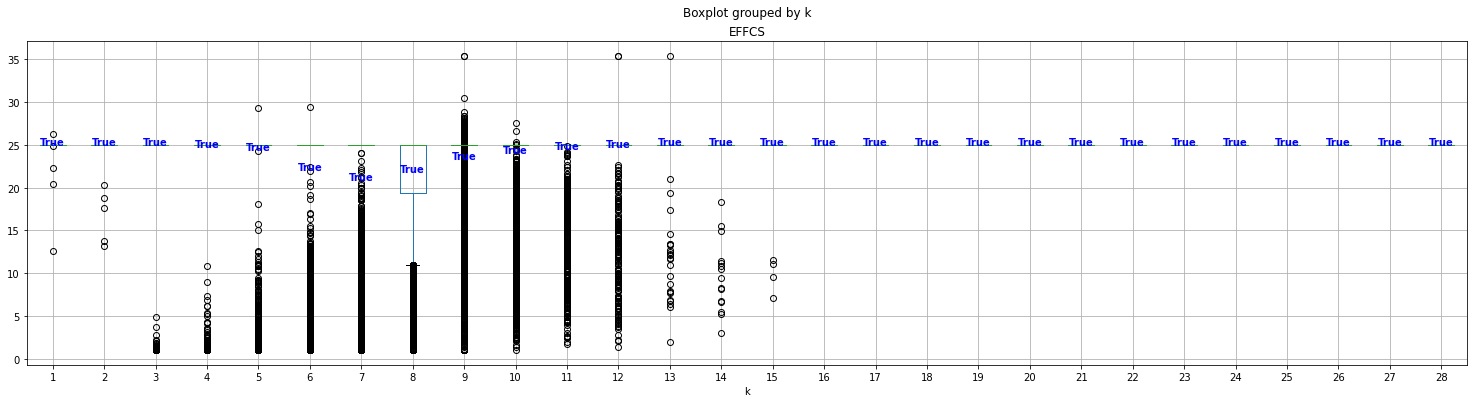

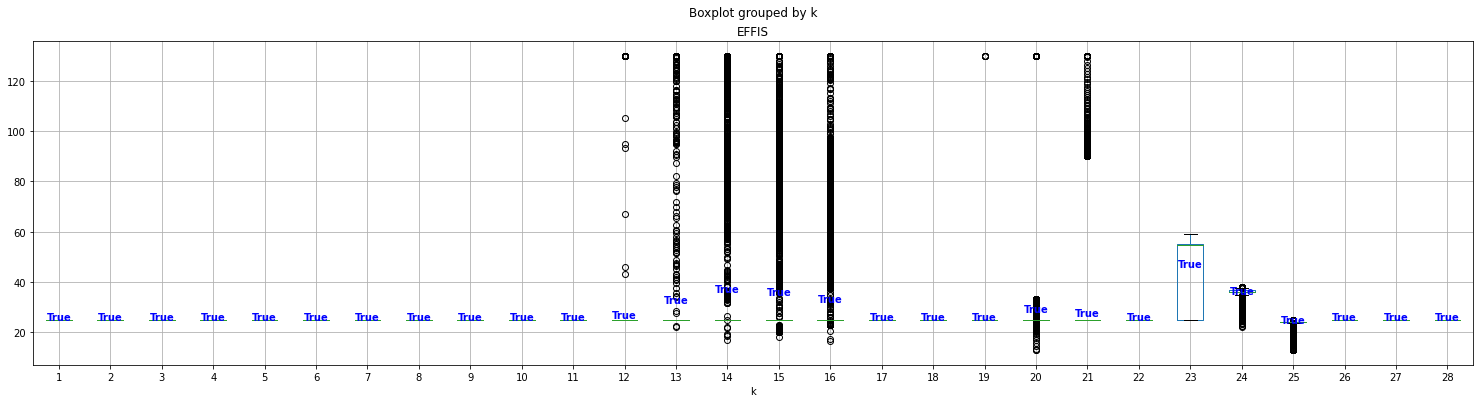

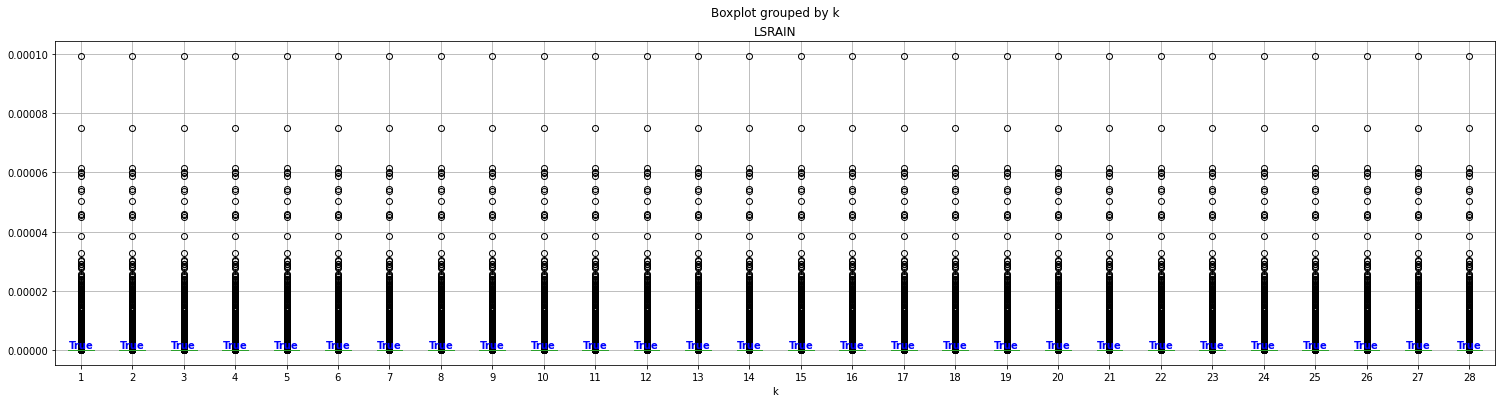

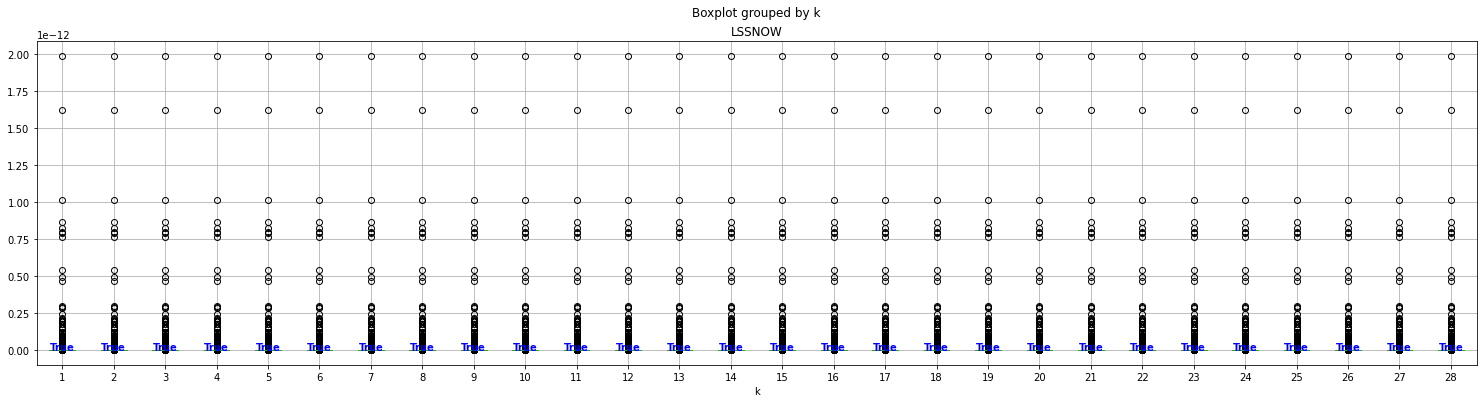

In [ ]:
# variáveis de saída
bloxplot_levels(original_output_df)


# Criação das bases de treino e testes

In [ ]:
def get_percent_normalized_trainining_and_validation(normalized_all_examples, normalized_all_targets, train_percent_size):
  # Seleciona o final do data set como base de testes individual, o que faz mas sentido para dados meteorologicos
  # sequenciais 

  all_size = len(normalized_all_examples)
  train_size = int(all_size * train_percent_size / k_max)*k_max
  print("train size = {}".format(train_size))

  normalized_training_examples = normalized_all_examples.head(train_size)
  normalized_training_targets = normalized_all_targets.head(train_size)

  # Choose the last (10%) (out of 265468) for validation.
  normalized_validation_examples = normalized_all_examples.iloc[train_size:]
  normalized_validation_targets = normalized_all_targets.iloc[train_size:]
  return normalized_training_examples, normalized_training_targets, normalized_validation_examples, normalized_validation_targets


def get_df_col_k(df_orig, k_inicial, k_final, dic_var_levs_exclude=None):
  # converte as linhas, que representam um nivel k, em uma linha com todos os níveis

  print(df_orig.columns)
  dic_var_levs_exclude_ok = { \
  'LSRAIN':range(2,29),
  'LSSNOW':range(2,29)
  }  
  if dic_var_levs_exclude is not None:
    dic_var_levs_exclude_ok.update(dic_var_levs_exclude)
    
  df_col_k = pd.DataFrame()
  for col in df_orig.columns.tolist():
    if col == 'k':
        continue
    for k in range(k_inicial, k_final + 1):
      df = df_orig.copy()
      df_k = df[df['k'] == k]
      if col in dic_var_levs_exclude_ok.keys() and k in dic_var_levs_exclude_ok[col]:
          continue
      df_col_k['{}_k{}'.format(col, k)] = df_k[col].to_numpy()
  return df_col_k


# parâmetros de divisão das bases
train_percent_size=0.8
test_percent_size=1.0-train_percent_size

# níveis de variáveis a excluir do dataset (níveis sem variância ou sem dados)
dic_var_levels_exclude_examples = { \
  'ni': list(range(1,12)) + list(range(17,19)) + [22] + list(range(26,29)),
  'ns': list(range(1,5)) + list(range(27,29)),
  'nr': list(range(16,29)),
  'NG': list(range(1,5)) + list(range(22,24)) + list(range(22,29)),
  'NC': list(range(16,29)),
	'tke': list(range(10,19)) + list(range(20,26))
}

dic_var_levels_exclude_targets = { \
  'qc': list(range(16,29)),
  'qi': list(range(16,29)),
  'qr': list(range(1,12)) + list(range(17,19)) + [22] + list(range(26,29)),
  'qs': list(range(1,5)) + list(range(27,29)),
  'qg': list(range(1,5)) + list(range(22,24)) + list(range(27,29)),

  'ni': list(range(1,12)) + list(range(17,19)) + [22] + list(range(26,29)),
  'ns': list(range(1,5)) + list(range(27,29)),
  'nr': list(range(16,29)),
  'NG': list(range(1,5)) + list(range(22,24)) + list(range(22,29)),
  'NC': list(range(16,29))
}

normalized_training_examples, normalized_training_targets, normalized_validation_examples, normalized_validation_targets = get_percent_normalized_trainining_and_validation(all_examples, all_targets, train_percent_size)
# display.display(normalized_training_examples.describe())
# display.display(normalized_training_targets.describe())
# display.display(normalized_validation_examples.describe())
# display.display(normalized_validation_targets.describe())

normalized_training_examples = get_df_col_k(normalized_training_examples, k_inicial, k_final, dic_var_levels_exclude_examples)
normalized_training_targets = get_df_col_k(normalized_training_targets, k_inicial, k_final, dic_var_levels_exclude_targets)
normalized_validation_examples = get_df_col_k(normalized_validation_examples, k_inicial, k_final, dic_var_levels_exclude_examples)
normalized_validation_targets = get_df_col_k(normalized_validation_targets, k_inicial, k_final, dic_var_levels_exclude_targets)

arr_input_train = normalized_training_examples.to_numpy()
arr_output_train = normalized_training_targets.to_numpy()
arr_input_test = normalized_validation_examples.to_numpy()
arr_output_test = normalized_validation_targets.to_numpy()


train size = 212352
Index(['k', 'si', 'Tc', 'qv', 'qc', 'qr', 'qi', 'qs', 'qg', 'ni', 'ns', 'nr',
       'NG', 'NC', 'tke', 'kzh', 'omega'],
      dtype='object')
Index(['k', 'Tc', 'qv', 'qc', 'qr', 'qi', 'qs', 'qg', 'ni', 'ns', 'nr', 'NG',
       'NC', 'EFFCS', 'EFFIS', 'LSRAIN', 'LSSNOW'],
      dtype='object')
Index(['k', 'si', 'Tc', 'qv', 'qc', 'qr', 'qi', 'qs', 'qg', 'ni', 'ns', 'nr',
       'NG', 'NC', 'tke', 'kzh', 'omega'],
      dtype='object')
Index(['k', 'Tc', 'qv', 'qc', 'qr', 'qi', 'qs', 'qg', 'ni', 'ns', 'nr', 'NG',
       'NC', 'EFFCS', 'EFFIS', 'LSRAIN', 'LSSNOW'],
      dtype='object')


# Funções de criação e treinamento da MLP


In [ ]:
def get_custom_model(n_inputs, n_outputs, layers, neurons, loss='mse', activation='relu', momentum=None, l1_norm=None, l2_norm=None, regularizer_place='kernel'):

    sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
    if momentum is not None:
      sgd.momentum=momentum

    if l1_norm is None and l2_norm is None:
      kern_norm = None
    elif l1_norm is not None:
      kern_norm = tf.keras.regularizers.l1(l1=l1_norm)
    elif l2_norm is not None:
      kern_norm = tf.keras.regularizers.l2(l2=l2_norm)  
    else:
      kern_norm = tf.keras.regularizers.l1_l2(l1=l1_norm, l2=l2_norm)

    Dense = tf.keras.layers.Dense
    Model = tf.keras.Model

    inputs = tf.keras.layers.Input(shape=n_inputs)
    x = inputs
    for lay in range(layers):
      if regularizer_place == 'kernel':
        x = Dense(neurons, kernel_regularizer=kern_norm, activation=activation)(x)
      else:  # bias
        x = Dense(neurons, bias_regularizer=kern_norm, activation=activation)(x)
      if activation == 'selu':
        x.kernel_initializer='lecun_normal'
      
    out_layer = Dense(n_outputs,  activation="linear")(x)  #defaul = linear = no activation
    model = Model(inputs=inputs, outputs=out_layer)
    
    model.compile(loss=loss, optimizer=sgd, metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
    tf.keras.utils.plot_model(model, show_shapes=True)
    return model


# train and evaluate a model using repeated k-fold cross-validation
def train_model_and_validate(model, X_train, y_train, X_test, y_test, epochs=200, batch_size=64, splits=5):

  results = {}

  early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

  for spl in range(splits):
    print("Start training")
    start = time.time()
    history = model.fit(X_train, y_train, validation_split=test_percent_size, verbose=0, epochs=epochs, callbacks=[early_stop_callback], batch_size=batch_size, use_multiprocessing=True)
    end = time.time()
    print("Training finished in {} seconds".format(end-start))

    loss_metric_train = model.evaluate(X_train, y_train, verbose=0, batch_size=batch_size, use_multiprocessing=True)
    print( 'TRAINING set. split {} of {} : Loss = {} , RMSE = {}, MAE = {}'.format(spl+1, splits, loss_metric_train[0], loss_metric_train[1], loss_metric_train[2]))
    loss_metric_test = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size, use_multiprocessing=True)
    print( 'TEST set.     split {} of {} : Loss = {} , RMSE = {}, MAE = {}'.format(spl+1, splits, loss_metric_test[0], loss_metric_test[1], loss_metric_test[2]))
 
    # code for just one split
    results['RMSE train'] = loss_metric_train[1]
    results['MAE train'] = loss_metric_train[2]
    results['RMSE test'] = loss_metric_test[1]
    results['MAE test'] = loss_metric_test[2]

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(history.history['loss'], label="Loss Treino")
    plt.plot(history.history['val_loss'], label="Loss Validação")
    plt.plot(epochs+1, loss_metric_test[0], 'xr', markersize=5, label="Loss Test")
    plt.legend()
    plt.show()

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.plot(history.history['root_mean_squared_error'], label="RMSE Treino")
    plt.plot(history.history['mean_absolute_error'], label="MAE Treino")
    plt.plot(epochs+1, loss_metric_test[1], 'xr', markersize=5, label="RMSE Test")
    plt.plot(epochs+1, loss_metric_test[2], 'xg', markersize=5, label="MAE Test")
    plt.legend()
    plt.show()

  return results


# Testes com variação de parâmetros

Os testes abaixo variam os parâmetros e geram gráficos que exibem a qualidade 
* Camadas e neurônios
* Momentum
* Norma L2 

In [ ]:
def do_test(show_arq=False):
  test_name = "MLP arch={} mom={} L1={} L2={} on {}".format(arch, num_mom, L1_norm, L2_norm, regularizer_place)
  mname = 'M={} '.format(num_mom) if num_mom is not None else ''
  l1name = 'L1={} '.format(L1_norm) if L1_norm is not None else ''
  l2name = 'L2={}'.format(L2_norm) if L2_norm is not None else ''
  archname = 'A={} '.format(arch) if show_arq is True else ''
  tiny_name = archname + mname + l1name + l2name
  print(" =========== Executando teste {} ==================".format(test_name))
  model = get_custom_model(n_inputs, n_outputs, arch[0], arch[1], loss_type, activation, num_mom, L1_norm, L2_norm, regularizer_place) 
  model.summary(print_fn=print)

  print( "Input  train variables/size = {}/{}".format(n_inputs, arr_input_train.shape[0]))
  print( "Output train variables/size = {}/{} ".format(n_outputs, arr_output_train.shape[0]))

  result = train_model_and_validate(model, arr_input_train, arr_output_train, arr_input_test, arr_output_test, epochs=epochs, splits=splits)
  tests_results[tiny_name] = result


def plot_all_metrics(dic_tests_results):
  for k, v in dic_tests_results.items():
    print("====================================== {} ==========================================".format(k))
    plot_metrics('RMSE train', v)
    plot_metrics('RMSE test', v)
    plot_metrics('MAE train', v)
    plot_metrics('MAE test', v)


def plot_metrics(metric_analyz, tests_results):
  plt.figure(figsize=(15, 5))
  d = {}
  for k, v in tests_results.items():
    d[k] = v[metric_analyz]
  
  plt.ylabel(metric_analyz)
  plt.bar(range(len(d)), list(d.values()), align='center')
  for index, value in enumerate(d.values()):
    plt.text(index, value-(value/2), "{:.4f}".format(value), fontsize=15, rotation=90)
  plt.xticks(range(len(d)), list(d.keys()), rotation='vertical')
  plt.show()


 =========== Executando teste MLP arch=[2, 4] mom=None L1=None L2=None on None ==================
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1496      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 277)               1385      
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________
Input  train variables/size = 373/7584
Output train variables/size = 277/7584 
Start training
Training finished in 17.466057538986206 seconds
TRAINING set. spl

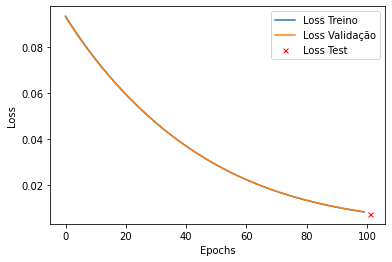

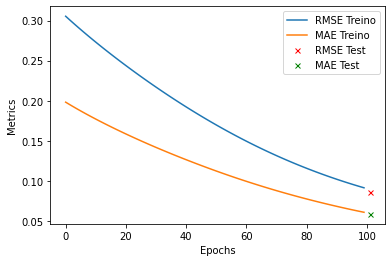

 =========== Executando teste MLP arch=[8, 4] mom=None L1=None L2=None on None ==================
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1496      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
___________________________

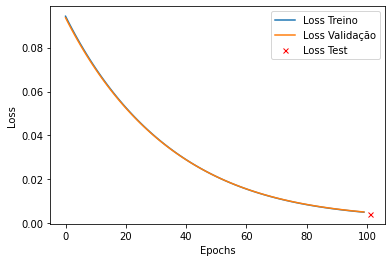

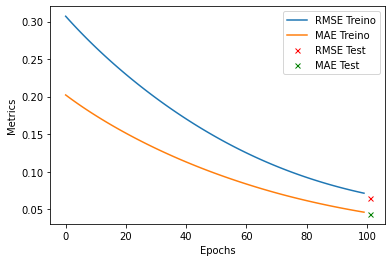

 =========== Executando teste MLP arch=[32, 4] mom=None L1=None L2=None on None ==================
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 1496      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
__________________________

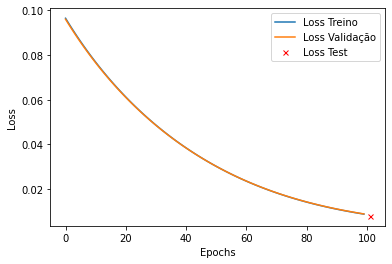

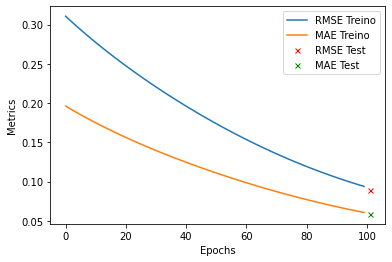

 =========== Executando teste MLP arch=[2, 8] mom=None L1=None L2=None on None ==================
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 2992      
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_47 (Dense)             (None, 277)               2493      
Total params: 5,557
Trainable params: 5,557
Non-trainable params: 0
_________________________________________________________________
Input  train variables/size = 373/7584
Output train variables/size = 277/7584 
Start training
Training finished in 17.21593165397644 seconds
TRAINING set. sp

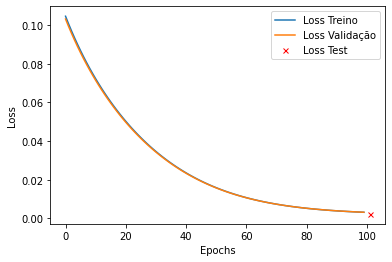

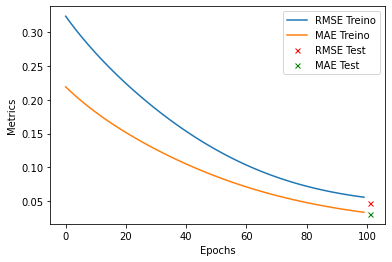

 =========== Executando teste MLP arch=[8, 8] mom=None L1=None L2=None on None ==================
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 2992      
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 72        
___________________________

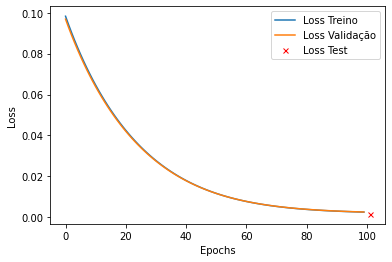

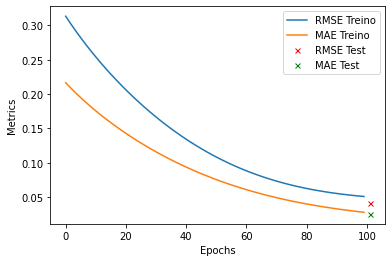

 =========== Executando teste MLP arch=[32, 8] mom=None L1=None L2=None on None ==================
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_57 (Dense)             (None, 8)                 2992      
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_59 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 72        
__________________________

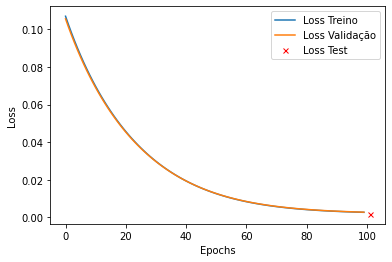

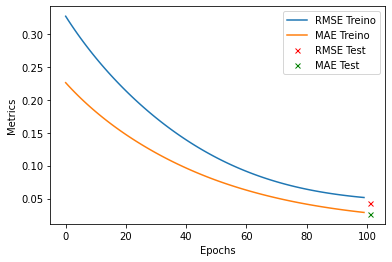

 =========== Executando teste MLP arch=[2, 16] mom=None L1=None L2=None on None ==================
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_90 (Dense)             (None, 16)                5984      
_________________________________________________________________
dense_91 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_92 (Dense)             (None, 277)               4709      
Total params: 10,965
Trainable params: 10,965
Non-trainable params: 0
_________________________________________________________________
Input  train variables/size = 373/7584
Output train variables/size = 277/7584 
Start training
Training finished in 17.72559690475464 seconds
TRAINING set.

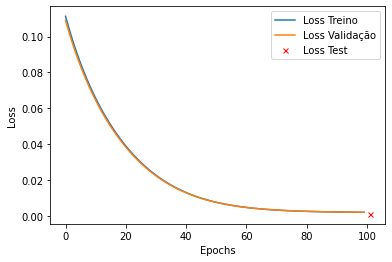

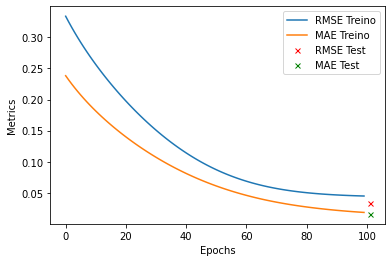

 =========== Executando teste MLP arch=[8, 16] mom=None L1=None L2=None on None ==================
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_93 (Dense)             (None, 16)                5984      
_________________________________________________________________
dense_94 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_95 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_96 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_97 (Dense)             (None, 16)                272       
__________________________

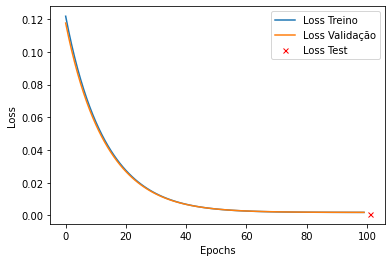

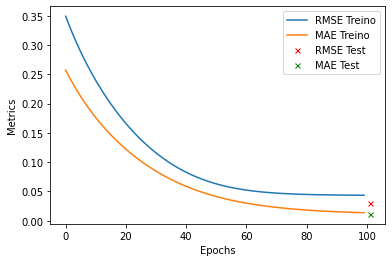

 =========== Executando teste MLP arch=[32, 16] mom=None L1=None L2=None on None ==================
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 373)]             0         
_________________________________________________________________
dense_102 (Dense)            (None, 16)                5984      
_________________________________________________________________
dense_103 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_104 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_105 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_106 (Dense)            (None, 16)                272       
_________________________

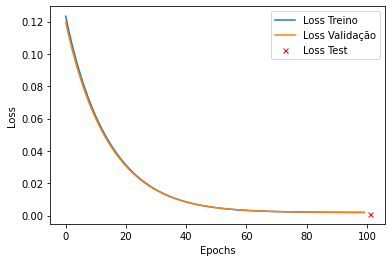

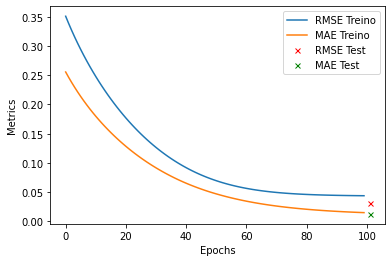

 =========== Executando teste MLP arch=[2, 32] mom=None L1=None L2=None on None ==================
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_135 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_136 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_137 (Dense)            (None, 277)               9141      
Total params: 22,165
Trainable params: 22,165
Non-trainable params: 0
_________________________________________________________________
Input  train variables/size = 373/7584
Output train variables/size = 277/7584 
Start training
Training finished in 18.32793617248535 seconds
TRAINING set.

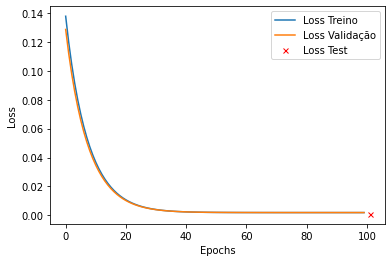

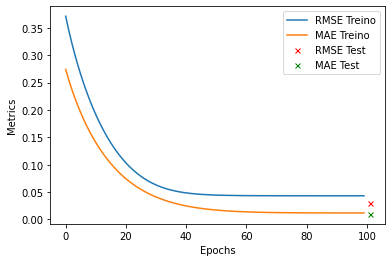

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=None on None ==================
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_138 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_139 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_140 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_141 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_142 (Dense)            (None, 32)                1056      
_________________________

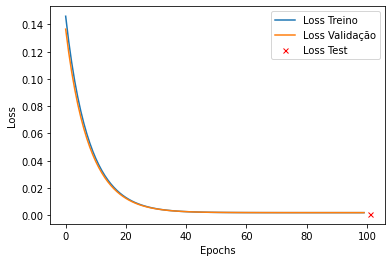

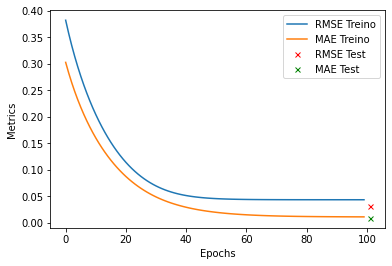

 =========== Executando teste MLP arch=[32, 32] mom=None L1=None L2=None on None ==================
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_147 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_148 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_149 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_150 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_151 (Dense)            (None, 32)                1056      
________________________

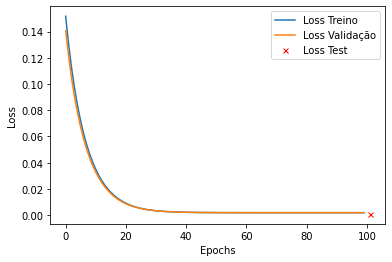

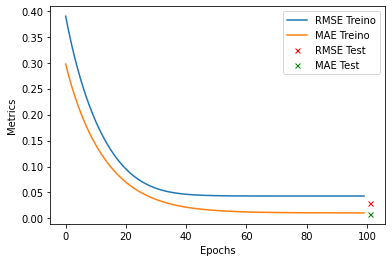

 =========== Executando teste MLP arch=[2, 64] mom=None L1=None L2=None on None ==================
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_180 (Dense)            (None, 64)                23936     
_________________________________________________________________
dense_181 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_182 (Dense)            (None, 277)               18005     
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________
Input  train variables/size = 373/7584
Output train variables/size = 277/7584 
Start training
Training finished in 21.762770175933838 seconds
TRAINING se

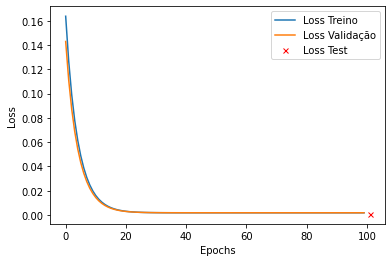

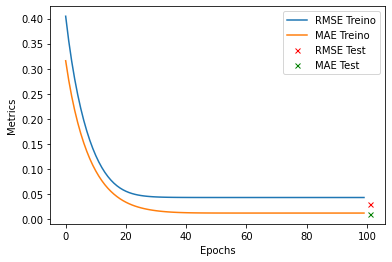

 =========== Executando teste MLP arch=[8, 64] mom=None L1=None L2=None on None ==================
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_183 (Dense)            (None, 64)                23936     
_________________________________________________________________
dense_184 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_185 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_186 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_187 (Dense)            (None, 64)                4160      
_________________________

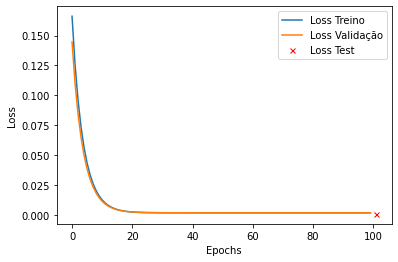

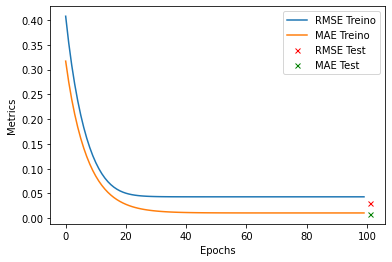

 =========== Executando teste MLP arch=[32, 64] mom=None L1=None L2=None on None ==================
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_192 (Dense)            (None, 64)                23936     
_________________________________________________________________
dense_193 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_194 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_195 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_196 (Dense)            (None, 64)                4160      
________________________

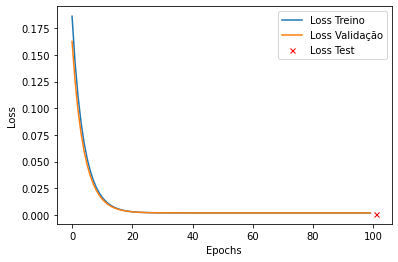

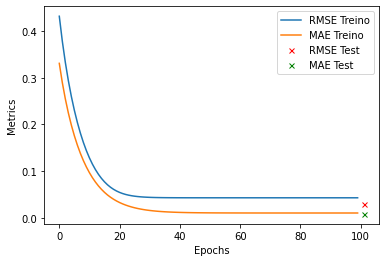

 =========== Executando teste MLP arch=[8, 32] mom=0.99999 L1=None L2=None on None ==================
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_225 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_226 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_227 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_228 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_229 (Dense)            (None, 32)                1056      
______________________

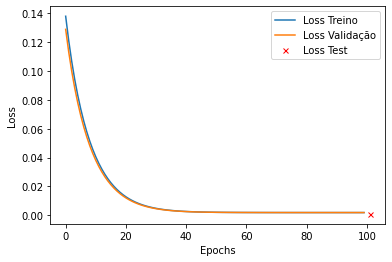

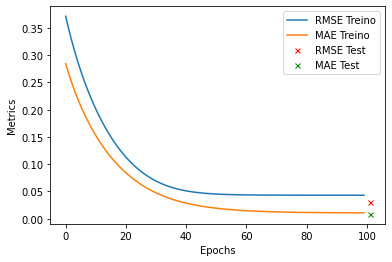

 =========== Executando teste MLP arch=[8, 32] mom=0.9999 L1=None L2=None on None ==================
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_234 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_235 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_236 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_237 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_238 (Dense)            (None, 32)                1056      
_______________________

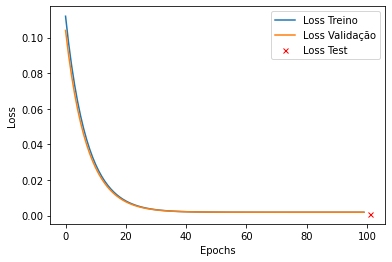

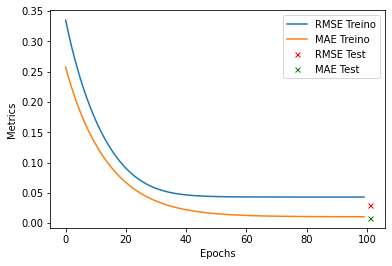

 =========== Executando teste MLP arch=[8, 32] mom=0.999 L1=None L2=None on None ==================
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_243 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_244 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_245 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_246 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_247 (Dense)            (None, 32)                1056      
________________________

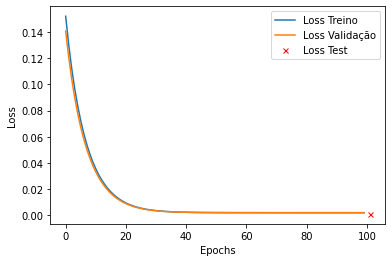

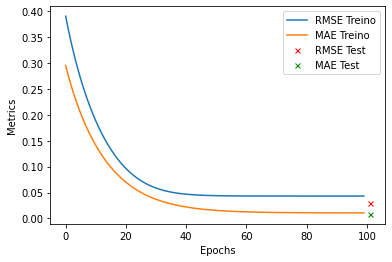

 =========== Executando teste MLP arch=[8, 32] mom=0.99 L1=None L2=None on None ==================
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_252 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_253 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_254 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_255 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_256 (Dense)            (None, 32)                1056      
_________________________

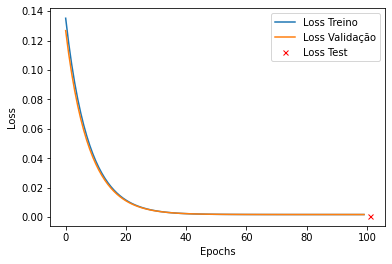

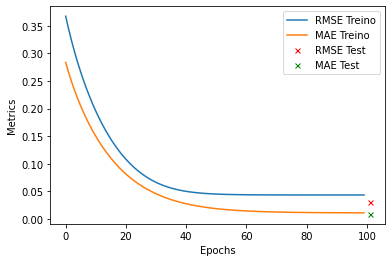

 =========== Executando teste MLP arch=[8, 32] mom=0.9 L1=None L2=None on None ==================
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_261 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_262 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_263 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_264 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_265 (Dense)            (None, 32)                1056      
__________________________

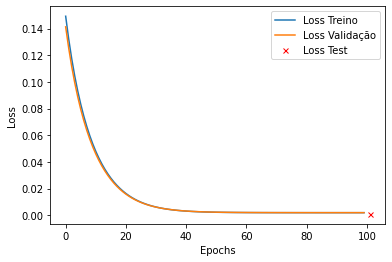

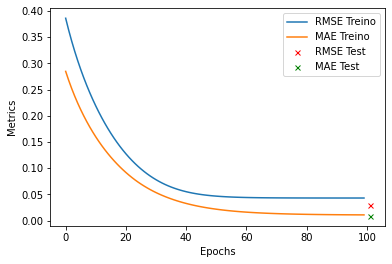

 =========== Executando teste MLP arch=[8, 32] mom=None L1=1e-05 L2=None on kernel ==================
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_270 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_271 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_272 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
______________________

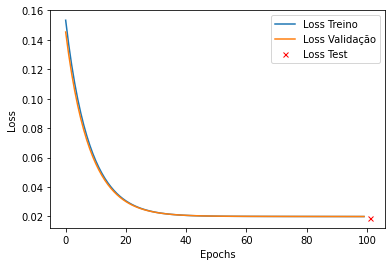

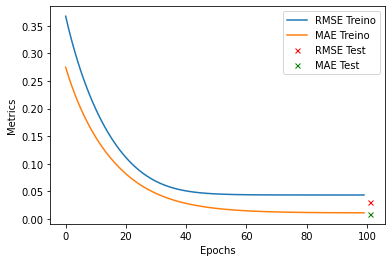

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.0001 L2=None on kernel ==================
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_279 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_280 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_281 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_282 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_283 (Dense)            (None, 32)                1056      
_____________________

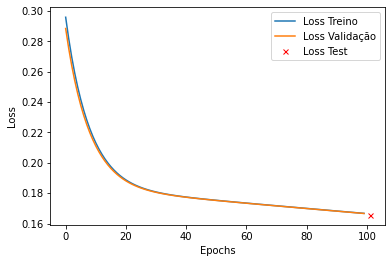

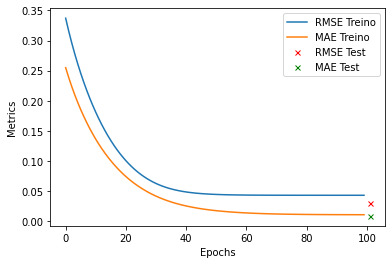

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.001 L2=None on kernel ==================
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_288 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_289 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_290 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_291 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_292 (Dense)            (None, 32)                1056      
______________________

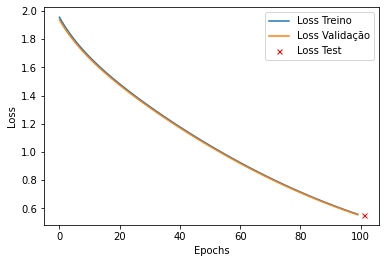

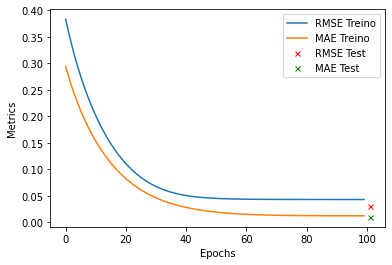

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.01 L2=None on kernel ==================
Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_297 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_298 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_299 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_300 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_301 (Dense)            (None, 32)                1056      
_______________________

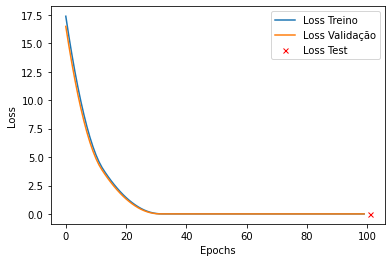

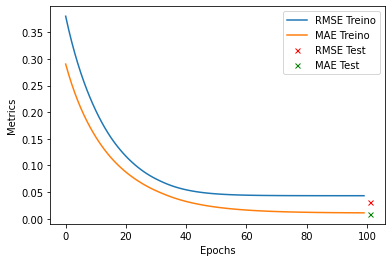

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.1 L2=None on kernel ==================
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_306 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_307 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_308 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_309 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_310 (Dense)            (None, 32)                1056      
________________________

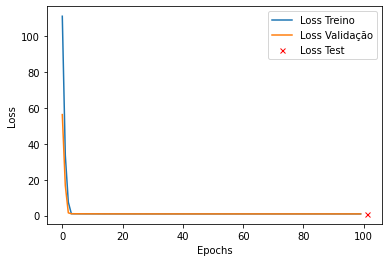

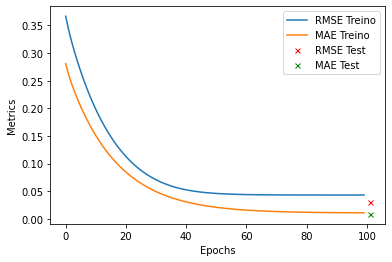

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=1e-05 on kernel ==================
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_315 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_316 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_317 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_318 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_319 (Dense)            (None, 32)                1056      
______________________

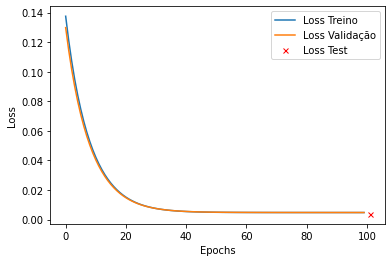

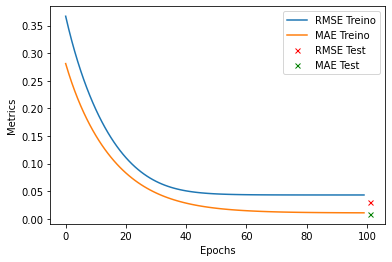

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.0001 on kernel ==================
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_324 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_325 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_326 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_327 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_328 (Dense)            (None, 32)                1056      
_____________________

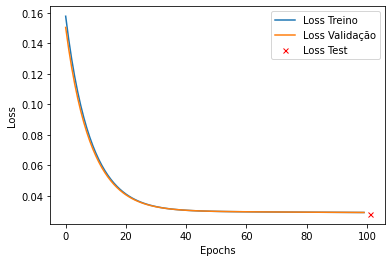

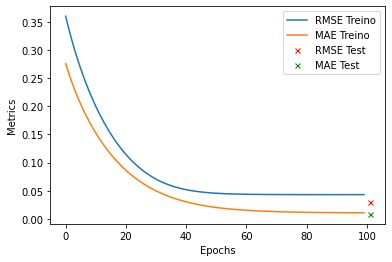

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.001 on kernel ==================
Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_333 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_334 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_335 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_336 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_337 (Dense)            (None, 32)                1056      
______________________

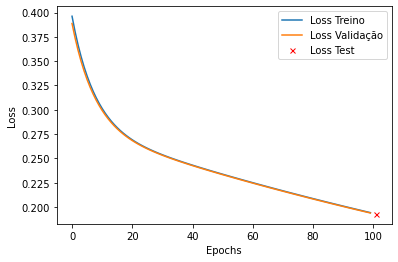

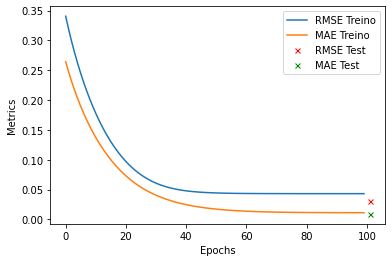

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.01 on kernel ==================
Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_342 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_343 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_344 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_345 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_346 (Dense)            (None, 32)                1056      
_______________________

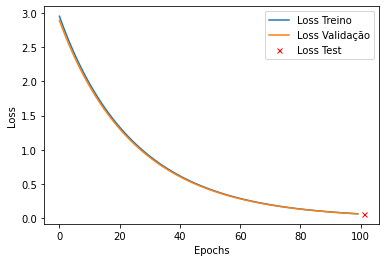

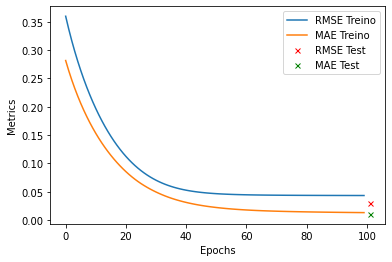

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.1 on kernel ==================
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_351 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_352 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_353 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_354 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_355 (Dense)            (None, 32)                1056      
________________________

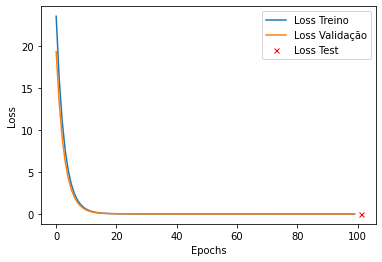

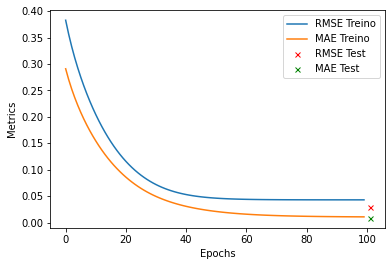

 =========== Executando teste MLP arch=[8, 32] mom=None L1=1e-05 L2=None on bias ==================
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_360 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_361 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_362 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_363 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_364 (Dense)            (None, 32)                1056      
________________________

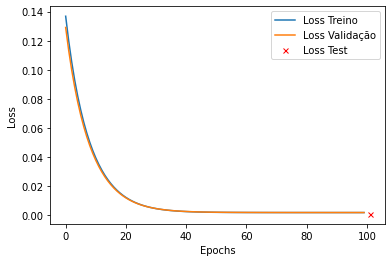

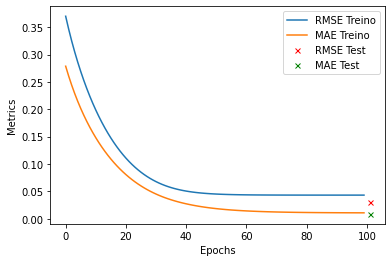

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.0001 L2=None on bias ==================
Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_369 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_370 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_371 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_372 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_373 (Dense)            (None, 32)                1056      
_______________________

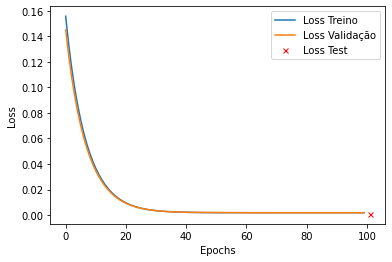

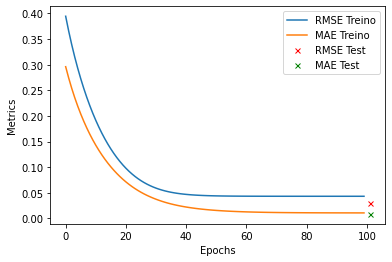

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.001 L2=None on bias ==================
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_378 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_379 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_380 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_381 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_382 (Dense)            (None, 32)                1056      
________________________

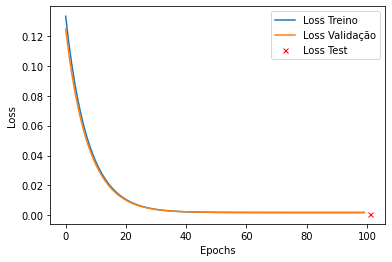

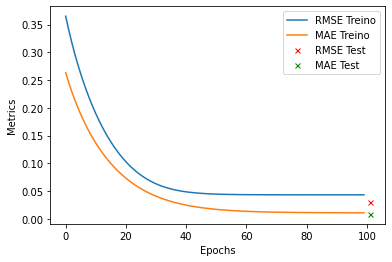

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.01 L2=None on bias ==================
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_387 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_388 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_389 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_390 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_391 (Dense)            (None, 32)                1056      
_________________________

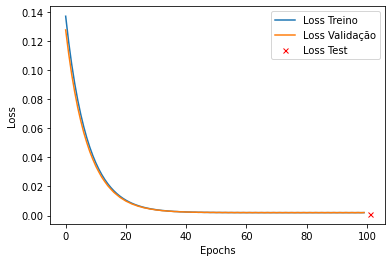

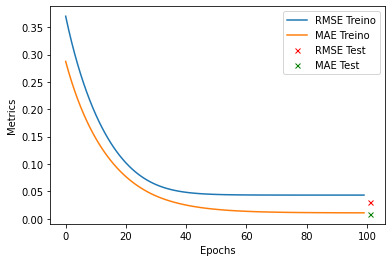

 =========== Executando teste MLP arch=[8, 32] mom=None L1=0.1 L2=None on bias ==================
Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_396 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_397 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_398 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_399 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_400 (Dense)            (None, 32)                1056      
__________________________

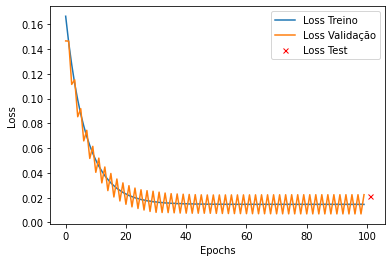

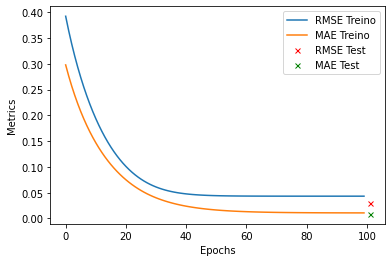

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=1e-05 on bias ==================
Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_405 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_406 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_407 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_408 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_409 (Dense)            (None, 32)                1056      
________________________

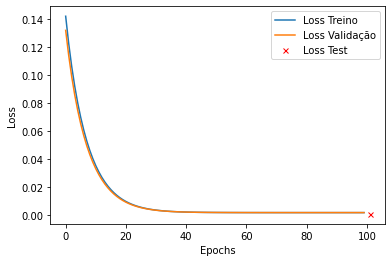

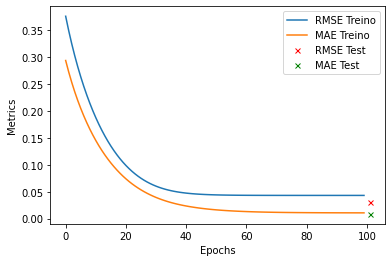

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.0001 on bias ==================
Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_414 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_415 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_416 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_417 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_418 (Dense)            (None, 32)                1056      
_______________________

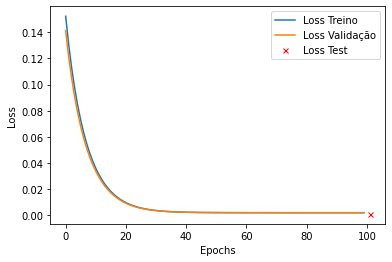

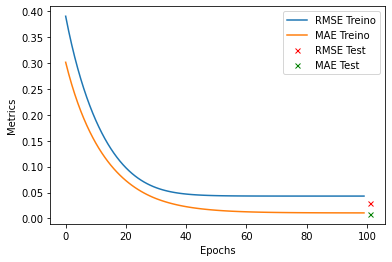

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.001 on bias ==================
Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_423 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_424 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_425 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_426 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_427 (Dense)            (None, 32)                1056      
________________________

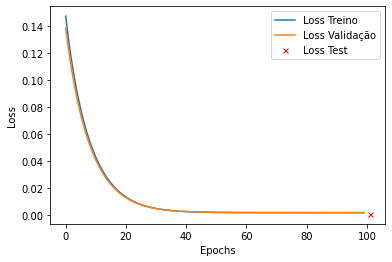

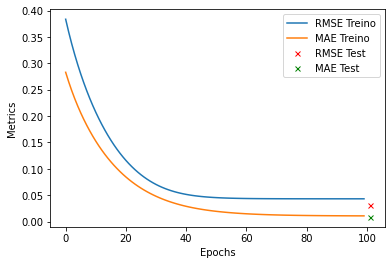

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.01 on bias ==================
Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_432 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_433 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_434 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_435 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_436 (Dense)            (None, 32)                1056      
_________________________

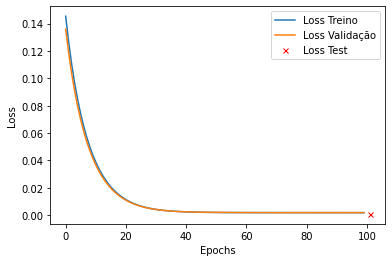

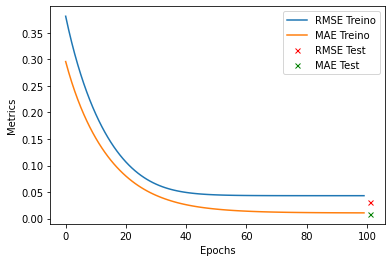

 =========== Executando teste MLP arch=[8, 32] mom=None L1=None L2=0.1 on bias ==================
Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 373)]             0         
_________________________________________________________________
dense_441 (Dense)            (None, 32)                11968     
_________________________________________________________________
dense_442 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_443 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_444 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_445 (Dense)            (None, 32)                1056      
__________________________

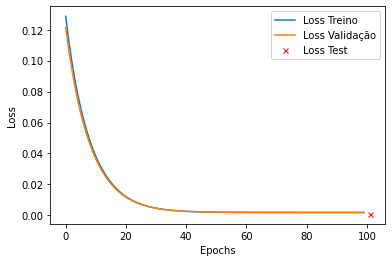

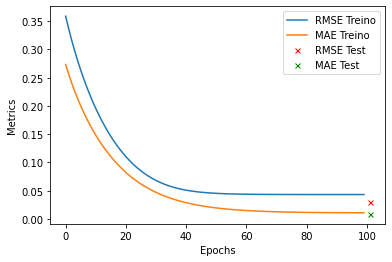

In [ ]:

# fixed model parameters
n_inputs = arr_input_train.shape[1]
n_outputs = arr_output_train.shape[1]
loss_type = 'mse'
# https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6
activation = 'sigmoid'

# fixed train parameters
epochs=100
splits=1

# varying model parameters

arch_layers_neurons = [   
                          [2, 4],  [8, 4],  [32, 4],                       
                          [2, 8],  [8, 8],  [32, 8],
                          [2, 16], [8, 16], [32, 16],
                          [2, 32], [8, 32], [32, 32],
                          [2, 64], [8, 64], [32, 64], 
                       ]                        

arr_momentum = [0.99999, 0.9999, 0.999, 0.99, 0.9]
arr_L1 = [ 0.00001, 0.0001, 0.001, 0.01, 0.1]
arr_L2 = arr_L1
dic_tests_results = {}

# Find best arch
tests_results = {}
regularizer_place=None
L1_norm=None
L2_norm=None
num_mom=None
# choose the best arch
for arch in arch_layers_neurons:
  do_test(show_arq=True)
dic_tests_results['Architecture'] = tests_results

# Found best arch
arch_str='A=[8, 32] '
arch = [8, 32]

# Find best momentum
tests_results = { arch_str:tests_results[arch_str] }
L1_norm=None
L2_norm=None
for num_mom in arr_momentum:
  do_test()
dic_tests_results['Momentum'] = tests_results

# Find best L1 norm on kernel
regularizer_place='kernel'
tests_results = { arch_str:tests_results[arch_str] }
num_mom = None
L2_norm=None
for L1_norm in arr_L1:
  do_test()
dic_tests_results['L1 Norm on Kernel'] = tests_results

# Find best L2 norm on kernel
regularizer_place='kernel'
tests_results = { arch_str:tests_results[arch_str] }
num_mom = None
L1_norm = None
for L2_norm in arr_L2:
  do_test()
dic_tests_results['L2 Norm on Kernel'] = tests_results

# Find best L1 norm on bias
regularizer_place='bias'
tests_results = { arch_str:tests_results[arch_str] }
num_mom = None
L2_norm=None
for L1_norm in arr_L1:
  do_test()
dic_tests_results['L1 Norm on BIAS'] = tests_results

# Find best L2 norm on bias
regularizer_place='bias'
tests_results = { arch_str:tests_results[arch_str] }
num_mom = None
L1_norm = None
for L2_norm in arr_L2:
  do_test()
dic_tests_results['L2 Norm on BIAS'] = tests_results


# Resultados Obtidos

====================================== Architecture ==========================================


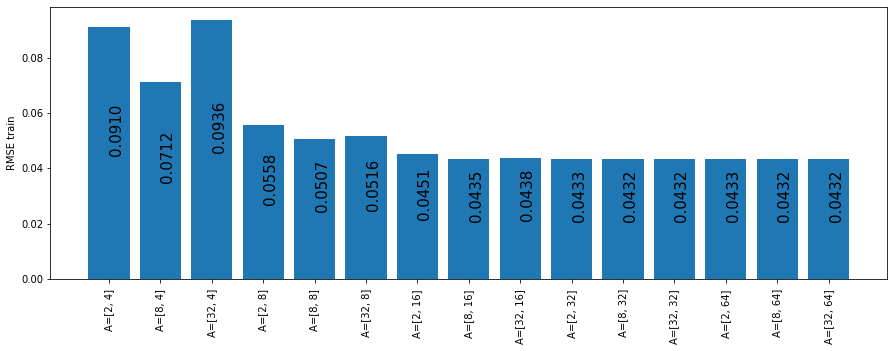

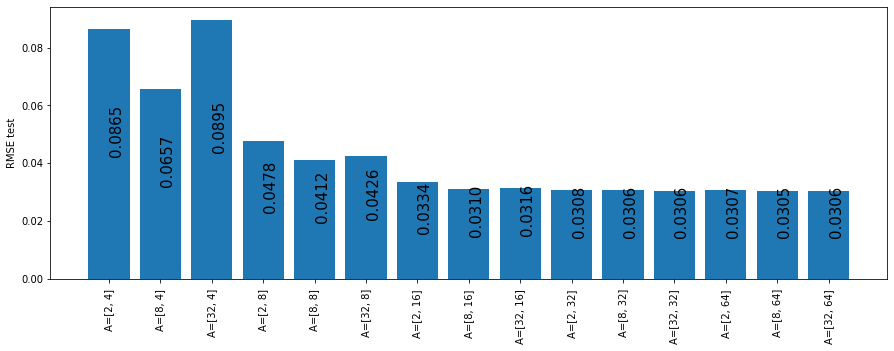

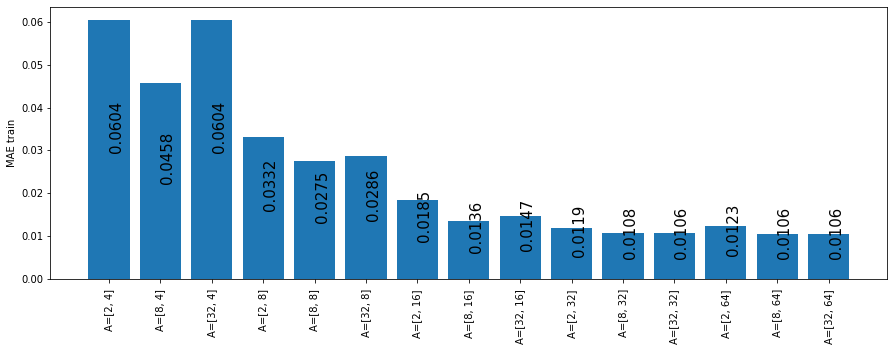

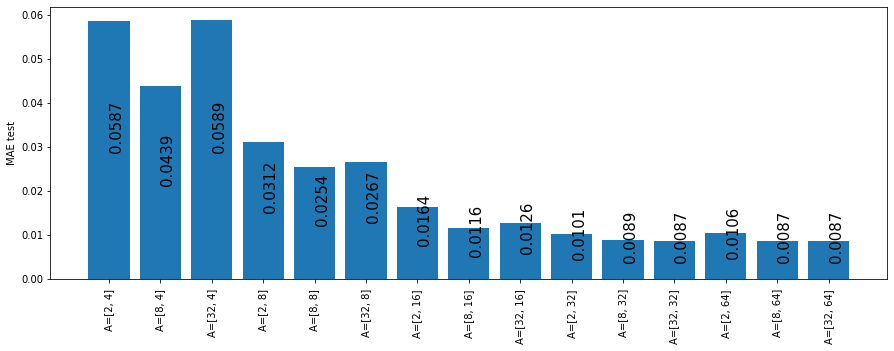

====================================== Momentum ==========================================


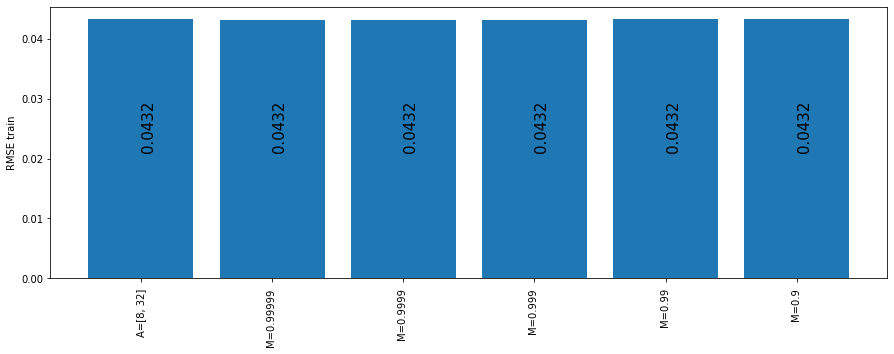

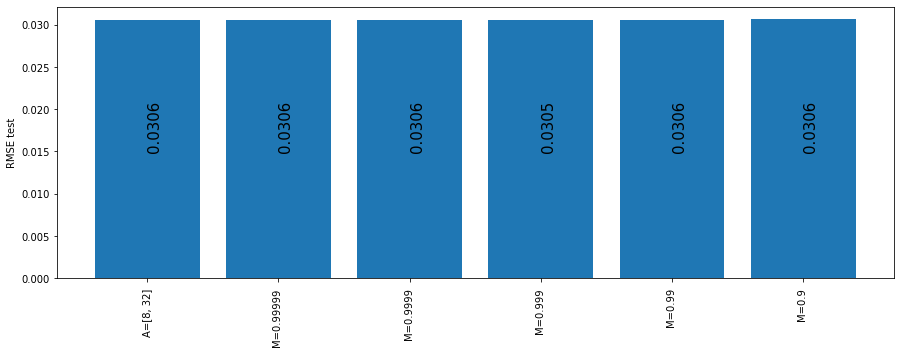

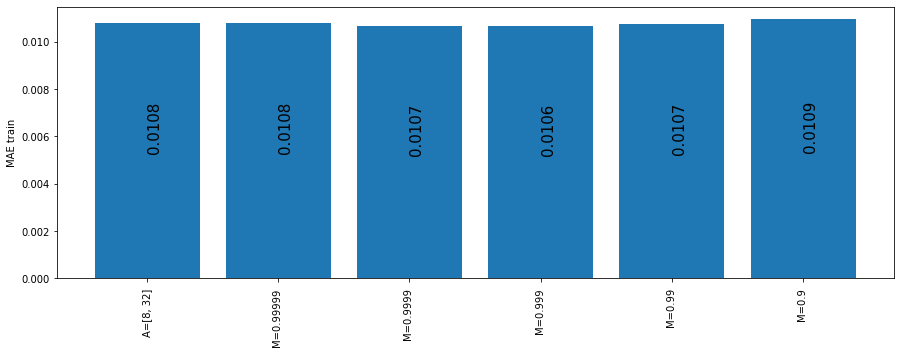

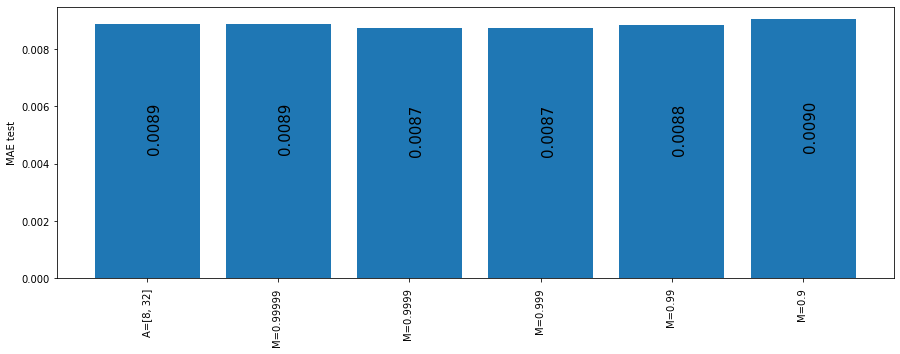

====================================== L1 Norm on Kernel ==========================================


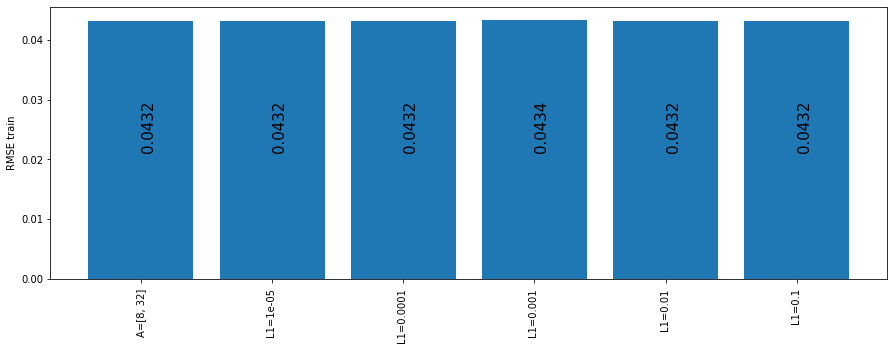

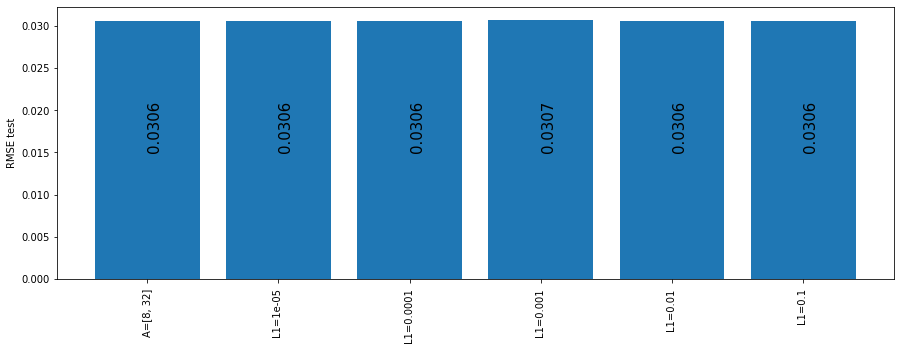

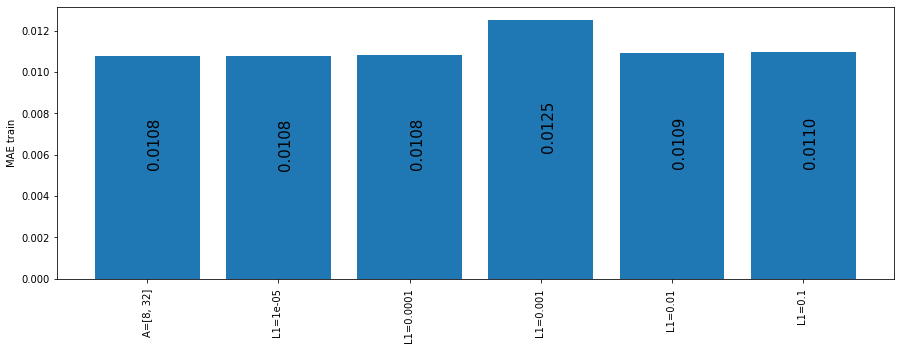

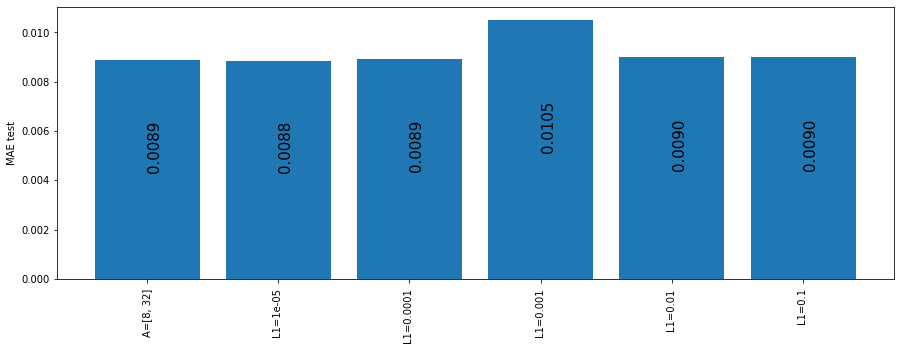

====================================== L2 Norm on Kernel ==========================================


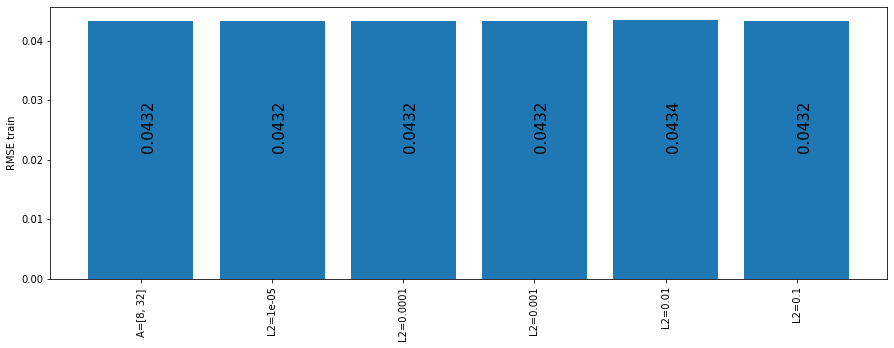

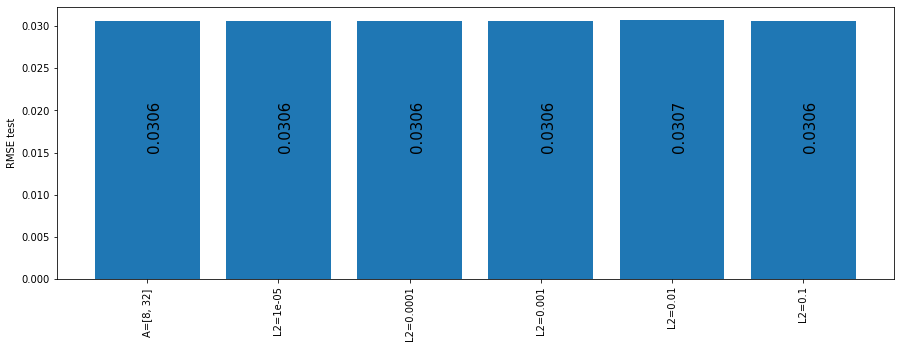

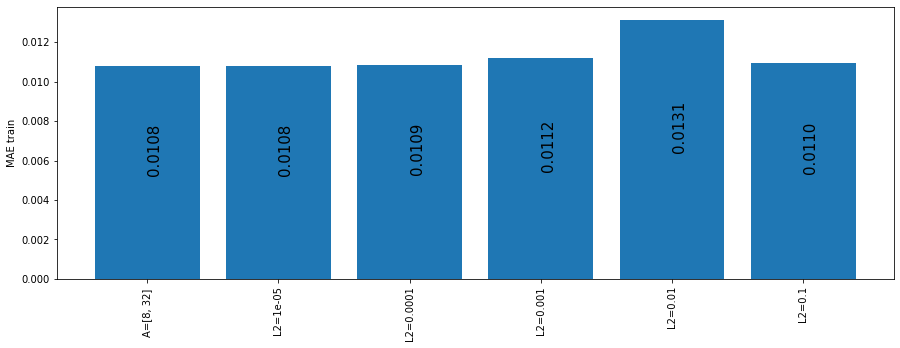

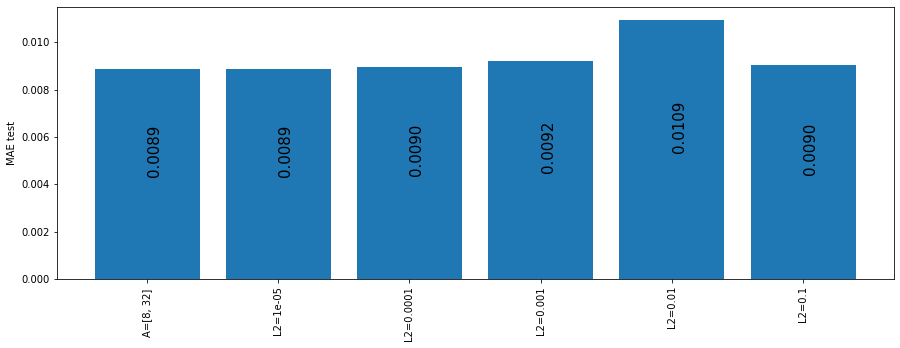

====================================== L1 Norm on BIAS ==========================================


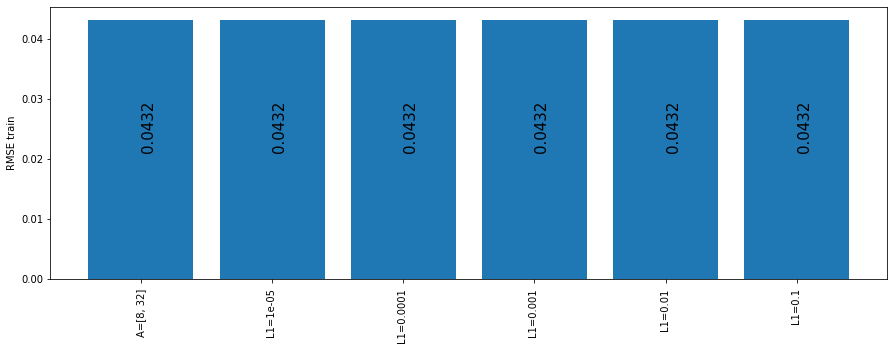

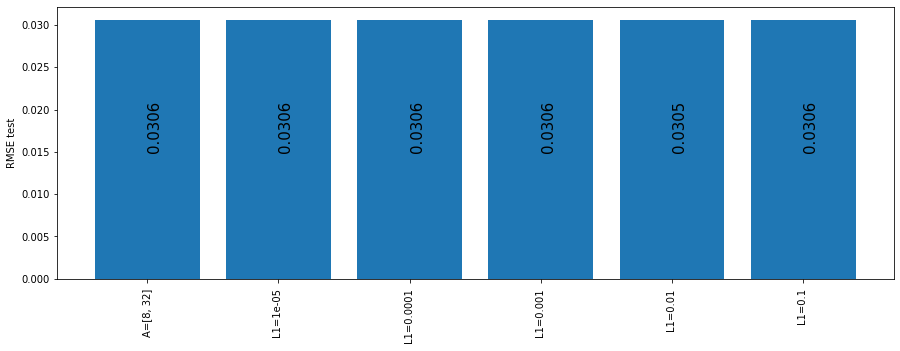

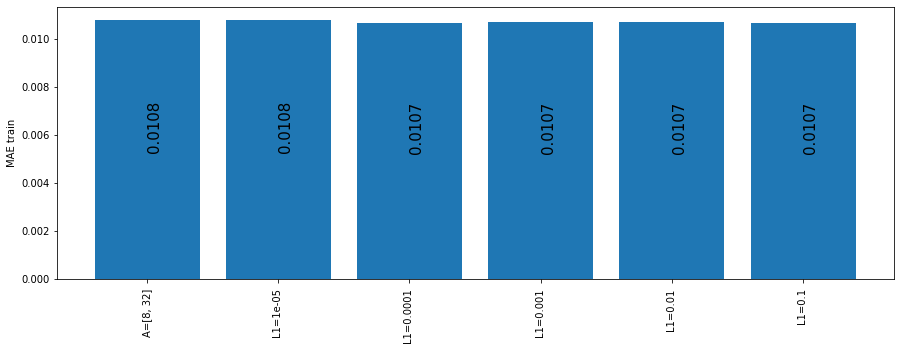

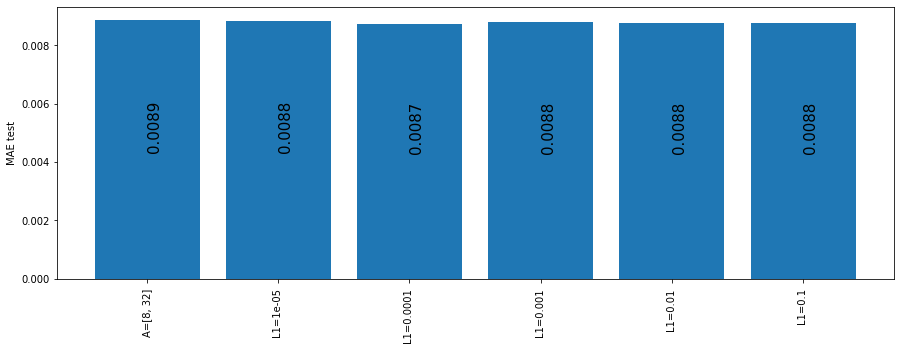

====================================== L2 Norm on BIAS ==========================================


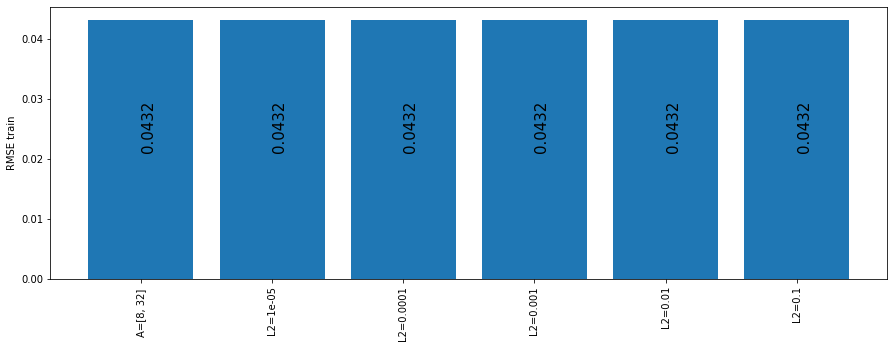

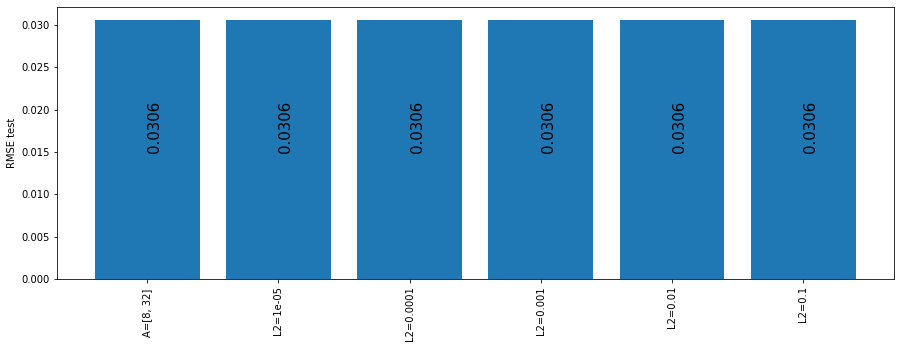

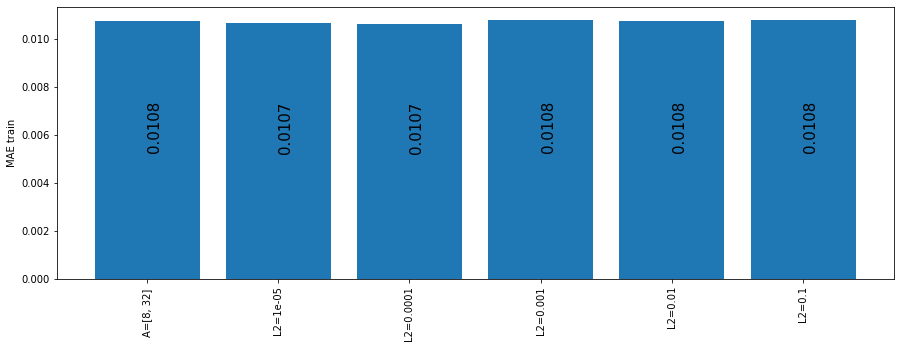

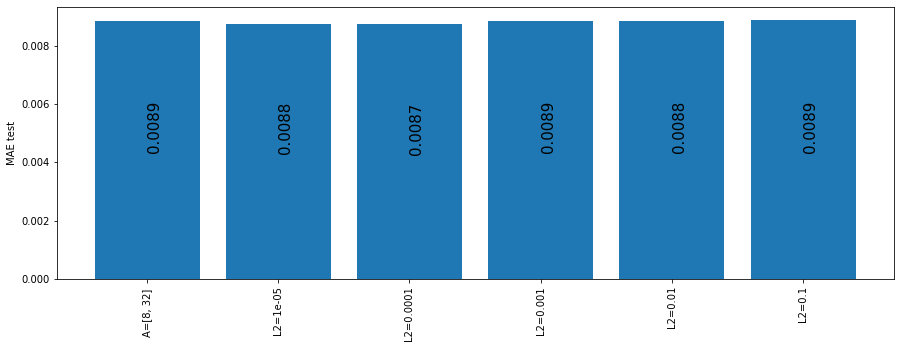

In [ ]:
plot_all_metrics(dic_tests_results)

# Considerações Finais

Em termos de RMSE, MAE e tamanho, a melhor arquitetura MLP encontrada foi
composta por 32 camadas de 8 neurônios. (Foram apresentados apenas resultados de 4 a 64 neurônios). O RMSE e MAE das bases de teste praticamente se estabilizam a partir de 32 neurônios. Ainda é desejável testar outras arquiteturas como a FCC e BMLP, para se tentar atingir no mínimo os mesmos resultados com arquiteturas menores.

A aplicação do momentum, não melhorou os resultados. Verifica-se que as redes se
comportaram bem durante o treinamento e não se verificou platôs de treinamento.
Em todas as arquiteturas testadas, não se verificou o overfitting. Por esse  motivo, a norma L1 sobre o Kernel não melhorou os resultados e a norma L2 sobre o Kernel melhorou suavemente o resultado do MAE com o valor 0,00001. A norma L1 sobre o BIAS melhorou suavemente o resultado do RMSE com o valor 0,01. A norma L2 sobre o BIAS não melhorou os resultados.

Considerando os resultados desse experimento, que utilizou a função sigmóide, o erro da arquitetura caiu suavemente com a diminuição do número de parâmetros. Em testes adicionais, que alteraram a função de ativação para relu ou selu, verificou-se uma maior variação dos erros nas arquiteturas. Nesses casos, arquiteturas com mais camadas e menos neurônios obtiveram um menor erro e as
normas foram mais efetivas, em comparação aos resultados apresentados. (Como
exemplo, ao usar 32 camadas de 8 neurônios).